In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install scikit_na # for NA detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
  Created wheel for scikit_na: filename=scikit_na-0.1.1-py3-none-any.whl size=20451 sha256=228e18f34a803713e98009eb88b9bdfaeda58e76e5a99cf3b9eb3c51f5eab42f
  Stored in directory: /root/.cache/pip/wheels/32/21/e5/3e7158df9691e304b37fc55bed33bf812b97d65125a39d6651
Successfully built scikit_na


In [ ]:
import numpy as np
import  pandas as pd
import scikit_na as na

In [ ]:
# for cluster analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler # for normalization of data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import plotly.express as px
import statsmodels.api as sm
import matplotlib.ticker as mtick

In [ ]:
from scipy import stats # for formal tests
from scipy.stats import levene
import statsmodels.stats.multicomp as mc # for Tuckey-Kramer post-hoc test

In [ ]:
pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikit_posthocs as sp # for post hoc analysis

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=30bd6b2de101006a045665032307992f6f7700275e3e4715de3c14f8e4ce438b
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
import pingouin as pg # for Welch's ANOVA

In [ ]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=b88c02807e2fac0e276883e1a9e1a201318238701513aa216e106ac4c8c3ca55
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
# for parsing
import requests
from bs4 import BeautifulSoup

---------------------------------------------
### Hero Profiles Analysis
---------------------------------------------

- The first step of this project is conducting cluster analysis to reveal profiles of Dota 2 heroes depending on roles they are used.
- The problem is that player behaviour and transfer of such a behaviour may depend heavily on certain roles/positions or builds (that are more suitable for particular heroes), which are more preferable for a player.
- For instance, a hero Drow Ranger is carry, which means that she needs getting more experience to improve her spells & abilities, and gold to purchase right items to power up this hero. At the same time, Drow Ranger might be chosen as a disabler (a role for incapacitating enemy heroes) or pusher (one that destroying enemy towers). On the other side, a hero Crystal Maiden is primarily a support, which means to keep her allies alive and give them opportunities to earn more gold and experience. This means that supports have the lowest experience and gold priority on the team - as the other leading roles need them more to push an enemy team more effectively. However, Crystal Maiden is also a good nuker (a hero with high damage & low cool down spells, generally balanced with high mana cost to deal a lot of damage to enemy heroes) and disabler.
- This variability of roles (8 at total) requires conducting cluster analysis based on actual game behaviour corresponding to each hero to revealing hero profiles (what games stats for clusters are and which roles fit the most).

In [ ]:
heroes = pd.read_excel('/content/drive/MyDrive/dota2_project/data/heroes.xlsx')
players = pd.read_csv('/content/drive/MyDrive/dota2_project/data/players.csv')

In [ ]:
heroes.head()

name  hero_id  localized_name  carry  support  \
0        npc_dota_hero_antimage        1       Anti-Mage   1.00     0.00   
1             npc_dota_hero_axe        2             Axe   0.33     0.00   
2            npc_dota_hero_bane        3            Bane   0.00     0.66   
3     npc_dota_hero_bloodseeker        4     Bloodseeker   0.33     0.00   
4  npc_dota_hero_crystal_maiden        5  Crystal Maiden   0.00     1.00   

   nuker  disabler  durable  escape  pusher  initiator     attribute  
0   0.33      0.00     0.00     1.0     0.0       0.00       agility  
1   0.00      0.66     1.00     0.0     0.0       1.00      strength  
2   0.33      1.00     0.33     0.0     0.0       0.00  intelligence  
3   0.33      0.33     0.00     0.0     0.0       0.33       agility  
4   0.66      0.66     0.00     0.0     0.0       0.00  intelligence

In [ ]:
players.head()

match_id  account_id  hero_id  player_slot  gold  gold_spent  gold_per_min  \
0         0           0       86            0  3261       10960           347   
1         0           1       51            1  2954       17760           494   
2         0           0       83            2   110       12195           350   
3         0           2       11            3  1179       22505           599   
4         0           3       67            4  3307       23825           613   

   xp_per_min  kills  deaths  ...  unit_order_glyph  \
0         362      9       3  ...               NaN   
1         659     13       3  ...               NaN   
2         385      0       4  ...               NaN   
3         605      8       4  ...               1.0   
4         762     20       3  ...               3.0   

   unit_order_eject_item_from_stash  unit_order_cast_rune  \
0                               NaN                   NaN   
1                               NaN                   NaN   
2                               NaN                   NaN   
3                               NaN                   NaN   
4                               NaN                   NaN   

  unit_order_ping_ability  unit_order_move_to_direction  unit_order_patrol  \
0                     6.0                           NaN                NaN   
1                    14.0                           NaN                NaN   
2                    17.0                           NaN                NaN   
3                    13.0                           NaN                NaN   
4                    23.0                           NaN                NaN   

   unit_order_vector_target_position  unit_order_radar  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   

   unit_order_set_item_combine_lock  unit_order_continue  
0                               NaN                  NaN  
1                               NaN                  NaN  
2                               NaN                  NaN  
3                               NaN                  NaN  
4                               NaN                  NaN  

[5 rows x 73 columns]

In [ ]:
players_clus = players[['match_id', 'account_id', 'hero_id', 'gold_spent', 'gold_per_min', 'xp_per_min', 'hero_damage', \
                        'tower_damage', 'kills', 'assists', 'deaths', 'level']]
players_clus['kda'] = np.where((players_clus['deaths'] == 0), (players_clus['kills'] + players_clus['assists']), \
                               (players_clus['kills'] + players_clus['assists']) / players_clus['deaths'])
players_clus.head()

match_id  account_id  hero_id  gold_spent  gold_per_min  xp_per_min  \
0         0           0       86       10960           347         362   
1         0           1       51       17760           494         659   
2         0           0       83       12195           350         385   
3         0           2       11       22505           599         605   
4         0           3       67       23825           613         762   

   hero_damage  tower_damage  kills  assists  deaths  level        kda  
0         8690           143      9       18       3     16   9.000000  
1        23747           423     13       18       3     22  10.333333  
2         4217           399      0       15       4     17   3.750000  
3        14832          6055      8       19       4     21   6.750000  
4        33740          1833     20       17       3     24  12.333333

- ```account_id``` is a unique identificator of a player. Meanwhile, ```match_id``` is an ID of a match played, and it is duplicated fixed number of times (10), since 10 is a maximum number of players that are able to participate in a certain Dota 2 match. So in each row, match_id corresponds player_id meaning that a certain player participated in a particular game.
- `gold_spent` indicates how much gold the player spent in a game
- `gold_per_min` - gold per minute obtained by a player in a match
- `xp_per_min`- expirience per minute obtained by a player in a match
- `tower_damage` - total tower damage done by the player in a match
- `hero_damage` - total damage to enemy heroes made by a player in a match
- `kda` - "Kill-Death-Assist" in Dota 2. It is a metric used to measure how effective a player is in combat. It is calculated as follows:
KDA = (Kills + Assists) / Deaths. The higher KDA, the better
- `level` - level of a player at the end of the game



KDA stands for "Kill-Death-Assist" in Dota 2. It is a metric used to measure how effective a player is in combat. It is calculated as follows:

KDA = (Kills + Assists) / Deaths

Where "Kills" are the number of enemy heroes a player has killed, "Assists" are the number of enemy heroes a player has helped to kill, and "Deaths" are the number of times a player has been killed by an enemy hero.

A high KDA is generally considered good, as it means that a player is making meaningful contributions to the team's effort to win the game, without dying often. Conversely, a low KDA is usually indicative of poor play, as it suggests that a player is either not aggressive enough in seeking out kills and assists or is dying more often than they should.

However, there are some cases where having a lower KDA might be acceptable, such as when playing a support role where the player's main goal is to keep their teammates alive and set them up for kills, rather than getting kills themselves. In such cases, a support player might have a lower KDA but still be contributing to the team's success.

For example, imagine a scenario where a support player has 1 kill, 10 assists, and 5 deaths, resulting in a KDA of 2.2. This might seem like a low KDA, but if the player was instrumental in helping their

In [ ]:
players_clus.shape

(500000, 13)

In [ ]:
players_clus.hero_id.unique() == heroes.hero_id.astype(int).unique() # not all hero IDs are in both dfs

False

In [ ]:
# which hero IDs are not in the players_clus df?
for i in range(len(players_clus.hero_id.unique())):
  if players_clus.hero_id.unique()[i] not in heroes.hero_id.astype(int).unique():
     print(players_clus.hero_id.unique()[i])

0


In [ ]:
players_clus = players_clus[players_clus['hero_id']!=0]
players_clus.shape

(499963, 13)

Hero IDs of 0 are excluded from the sample of players stats

In [ ]:
na.summary(players_clus).T # No NAs

NA count  NA, % (per column)  NA, % (of all NAs)  \
match_id           0.0                 0.0                 0.0   
account_id         0.0                 0.0                 0.0   
hero_id            0.0                 0.0                 0.0   
gold_spent         0.0                 0.0                 0.0   
gold_per_min       0.0                 0.0                 0.0   
xp_per_min         0.0                 0.0                 0.0   
hero_damage        0.0                 0.0                 0.0   
tower_damage       0.0                 0.0                 0.0   
kills              0.0                 0.0                 0.0   
assists            0.0                 0.0                 0.0   
deaths             0.0                 0.0                 0.0   
level              0.0                 0.0                 0.0   
kda                0.0                 0.0                 0.0   

              NA unique (per column)  NA unique, % (per column)  \
match_id                         0.0                        0.0   
account_id                       0.0                        0.0   
hero_id                          0.0                        0.0   
gold_spent                       0.0                        0.0   
gold_per_min                     0.0                        0.0   
xp_per_min                       0.0                        0.0   
hero_damage                      0.0                        0.0   
tower_damage                     0.0                        0.0   
kills                            0.0                        0.0   
assists                          0.0                        0.0   
deaths                           0.0                        0.0   
level                            0.0                        0.0   
kda                              0.0                        0.0   

              Rows left after dropna()  Rows left after dropna(), %  
match_id                      499963.0                        100.0  
account_id                    499963.0                        100.0  
hero_id                       499963.0                        100.0  
gold_spent                    499963.0                        100.0  
gold_per_min                  499963.0                        100.0  
xp_per_min                    499963.0                        100.0  
hero_damage                   499963.0                        100.0  
tower_damage                  499963.0                        100.0  
kills                         499963.0                        100.0  
assists                       499963.0                        100.0  
deaths                        499963.0                        100.0  
level                         499963.0                        100.0  
kda                           499963.0                        100.0

In [ ]:
# getting averages of game statistics grouping by heroes
selected_columns = players_clus[['hero_id',	'gold_spent', 'gold_per_min',	'xp_per_min',	'hero_damage', \
                                 'tower_damage', 'kda', 'level']]
players_clus_avg = selected_columns.groupby('hero_id').agg(np.mean).reset_index()
players_clus_avg.head()

hero_id    gold_spent  gold_per_min  xp_per_min   hero_damage  \
0        1  19535.906769    554.192742  580.392827  10162.878033   
1        2  13129.112150    400.109107  442.938274  11945.333188   
2        3   9834.171563    295.293380  336.720329   7838.933803   
3        4  15626.151894    447.641746  494.835927  13487.634641   
4        5  10367.259750    314.668876  346.943411   8805.037726   

   tower_damage       kda      level  
0   3081.401767  4.229892  20.574819  
1    453.616605  2.719573  18.033254  
2    381.018801  3.110437  15.563259  
3   1449.624831  2.814891  19.419824  
4    288.910018  2.831672  15.789064

In [ ]:
players_clus_avg.hero_id.nunique()

110

- So, avereges of game statistics by each hero are computed.

In [ ]:
# joining heroes' IDs with names
query = 'SELECT p.hero_id, h.localized_name AS name,	gold_spent,	gold_per_min, \
              	xp_per_min,	hero_damage, tower_damage, kda,	level \
           FROM players_clus_avg p JOIN heroes h \
             ON p.hero_id = h.hero_id'

players_clus_avg = pysqldf(query)
players_clus_avg.head()

hero_id            name    gold_spent  gold_per_min  xp_per_min  \
0        1       Anti-Mage  19535.906769    554.192742  580.392827   
1        2             Axe  13129.112150    400.109107  442.938274   
2        3            Bane   9834.171563    295.293380  336.720329   
3        4     Bloodseeker  15626.151894    447.641746  494.835927   
4        5  Crystal Maiden  10367.259750    314.668876  346.943411   

    hero_damage  tower_damage       kda      level  
0  10162.878033   3081.401767  4.229892  20.574819  
1  11945.333188    453.616605  2.719573  18.033254  
2   7838.933803    381.018801  3.110437  15.563259  
3  13487.634641   1449.624831  2.814891  19.419824  
4   8805.037726    288.910018  2.831672  15.789064

In [ ]:
players_clus_avg.hero_id.nunique() # correct

110

---------------
### Parsing data from DOTABUFF using Wayback Machine link
----------------


- I also want to take into account the nuances on hero positions in Dota 2 matches.
- Each hero can be taken on several positions (middle lane, off lane or safe lane).
- Position presence depend on meta relevant for time matches were played.
- The metagame (aka the meta) is the current trend that is often considered to be the optimal way to play the game by the community. This always changes over time, and is driven by community opinion, professional players, and balance patches.
- Aggregator dotabuff.com provides relevant statistics on hero presence on the lanes (meta).
- Since matches in the sample were played in the period of 05 Nov 2015 to 18 Nov 2015, I use meta relevant for that time using DOTABUFF old page on mete with the help of the service Wayback Machine.
- The version of DOTABUFF meta page is relevent on 04 Nov 2015 (https://web.archive.org/web/20151104210230/http://www.dotabuff.com/heroes/meta).

In [ ]:
# URL of the archived DOTABUFF meta page (mid lane position presence)
url = "https://web.archive.org/web/20151019115401/http://www.dotabuff.com/heroes/lanes?lane=mid"
# GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content
# BeautifulSoup to parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# table that contains the hero data
hero_table = soup.find_all("table")[0]

# empty lists for the data
hero_names_mid = []
middle_lane = []

# Loop through each row of the table and extracting the data
for row in hero_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if cols: # if a col is not empty
        # Extracting the hero name
        hero_name = cols[1].get_text(strip=True)
        hero_names_mid.append(hero_name)

        # Extracting the average presence (in percentages) for each lane
        middle_pct = cols[2].get_text(strip=True)
        middle_lane.append(float(middle_pct.replace("%", "")))

In [ ]:
mid = pd.DataFrame(
    {'name': hero_names_mid,
     'mid_lane': middle_lane,
    })
mid # correct

name  mid_lane
0       Shadow Fiend     89.10
1   Templar Assassin     87.09
2       Storm Spirit     86.87
3             Tinker     84.25
4            Invoker     74.75
..               ...       ...
75      Witch Doctor      5.35
76            Dazzle      5.12
77  Treant Protector      5.08
78      Chaos Knight      5.05
79           Phoenix      5.01

[80 rows x 2 columns]

In [ ]:
# URL of the archived DOTABUFF meta page (off lane position presence)
url = "https://web.archive.org/web/20151029092145/http://www.dotabuff.com/heroes/lanes?lane=off"
# GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content
# BeautifulSoup to parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# table that contains the hero data
hero_table = soup.find_all("table")[0]

# empty lists for the data
hero_names_off = []
off_lane = []

# Loop through each row of the table and extracting the data
for row in hero_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if cols: # if a col is not empty
        # Extracting the hero name
        hero_name = cols[1].get_text(strip=True)
        hero_names_off.append(hero_name)

        # Extracting the average presence (in percentages) for each lane
        off_pct = cols[2].get_text(strip=True)
        off_lane.append(float(off_pct.replace("%", "")))

In [ ]:
off = pd.DataFrame(
    {'name': hero_names_off,
     'off_lane': off_lane,
    })
off # correct

name  off_lane
0            Clockwerk     88.75
1            Timbersaw     85.65
2          Broodmother     84.51
3    Centaur Warrunner     82.40
4            Dark Seer     82.15
..                 ...       ...
101            Spectre      8.86
102       Ember Spirit      8.30
103          Anti-Mage      7.38
104             Tinker      6.90
105   Templar Assassin      5.17

[106 rows x 2 columns]

In [ ]:
# URL of the archived DOTABUFF meta page (safe lane position presence)
url = "https://web.archive.org/web/20151104132032/http://www.dotabuff.com/heroes/lanes?lane=safe"
# GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content
# BeautifulSoup to parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# table that contains the hero data
hero_table = soup.find_all("table")[0]

# empty lists for the data
hero_names_safe = []
safe_lane = []

# Loop through each row of the table and extracting the data
for row in hero_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if cols: # if a col is not empty
        # Extracting the hero name
        hero_name = cols[1].get_text(strip=True)
        hero_names_safe.append(hero_name)

        # Extracting the average presence (in percentages) for each lane
        safe_pct = cols[2].get_text(strip=True)
        safe_lane.append(float(safe_pct.replace("%", "")))

In [ ]:
safe = pd.DataFrame(
    {'name': hero_names_safe,
     'safe_lane': safe_lane,
    })
safe # correct

name  safe_lane
0           Anti-Mage      90.55
1             Spectre      89.03
2      Phantom Lancer      83.53
3       Faceless Void      77.92
4    Phantom Assassin      77.56
..                ...        ...
103     Queen of Pain       6.41
104              Chen       6.01
105         Clockwerk       5.78
106              Puck       5.33
107            Tinker       5.19

[108 rows x 2 columns]

The average presence of heroes on the lanes (%) is parsed.

Next, I join presence on lanes by hero names (note: if a hero is not included in a table of presence - this means that an average presence for a hero for a particular lane is 0%)

In [ ]:
presence_merged = pd.merge(mid, off, on='name', how='outer')
heroes_presence = pd.merge(presence_merged, safe, on='name', how='outer')
heroes_presence.fillna(0, inplace=True)
heroes_presence

name  mid_lane  off_lane  safe_lane
0        Shadow Fiend     89.10      0.00       7.12
1    Templar Assassin     87.09      5.17       6.61
2        Storm Spirit     86.87      0.00       7.82
3              Tinker     84.25      6.90       5.19
4             Invoker     74.75     16.72       7.53
..                ...       ...       ...        ...
104             Lycan      0.00     10.64      39.18
105       Lifestealer      0.00      9.07      39.60
106           Spectre      0.00      8.86      89.03
107         Anti-Mage      0.00      7.38      90.55
108              Chen      0.00      0.00       6.01

[109 rows x 4 columns]

In [ ]:
na.summary(heroes_presence).T # No NAs

NA count  NA, % (per column)  NA, % (of all NAs)  \
name            0.0                 0.0                 0.0   
mid_lane        0.0                 0.0                 0.0   
off_lane        0.0                 0.0                 0.0   
safe_lane       0.0                 0.0                 0.0   

           NA unique (per column)  NA unique, % (per column)  \
name                          0.0                        0.0   
mid_lane                      0.0                        0.0   
off_lane                      0.0                        0.0   
safe_lane                     0.0                        0.0   

           Rows left after dropna()  Rows left after dropna(), %  
name                          109.0                        100.0  
mid_lane                      109.0                        100.0  
off_lane                      109.0                        100.0  
safe_lane                     109.0                        100.0

In [ ]:
# joining average game stats for heroes with their average presence on lanes
players_clus_avg = pd.merge(players_clus_avg, heroes_presence, on='name', how='outer')
players_clus_avg.fillna(0, inplace=True)
players_clus_avg.head()

hero_id            name    gold_spent  gold_per_min  xp_per_min  \
0        1       Anti-Mage  19535.906769    554.192742  580.392827   
1        2             Axe  13129.112150    400.109107  442.938274   
2        3            Bane   9834.171563    295.293380  336.720329   
3        4     Bloodseeker  15626.151894    447.641746  494.835927   
4        5  Crystal Maiden  10367.259750    314.668876  346.943411   

    hero_damage  tower_damage       kda      level  mid_lane  off_lane  \
0  10162.878033   3081.401767  4.229892  20.574819      0.00      7.38   
1  11945.333188    453.616605  2.719573  18.033254      0.00     43.45   
2   7838.933803    381.018801  3.110437  15.563259     10.32     26.40   
3  13487.634641   1449.624831  2.814891  19.419824     13.89     15.93   
4   8805.037726    288.910018  2.831672  15.789064      0.00     15.73   

   safe_lane  
0      90.55  
1       8.07  
2      58.06  
3      29.29  
4      59.93

In [ ]:
players_clus_avg.hero_id.nunique()

110

In [ ]:
na.summary(players_clus_avg).T # No NAs

NA count  NA, % (per column)  NA, % (of all NAs)  \
hero_id            0.0                 0.0                 0.0   
name               0.0                 0.0                 0.0   
gold_spent         0.0                 0.0                 0.0   
gold_per_min       0.0                 0.0                 0.0   
xp_per_min         0.0                 0.0                 0.0   
hero_damage        0.0                 0.0                 0.0   
tower_damage       0.0                 0.0                 0.0   
kda                0.0                 0.0                 0.0   
level              0.0                 0.0                 0.0   
mid_lane           0.0                 0.0                 0.0   
off_lane           0.0                 0.0                 0.0   
safe_lane          0.0                 0.0                 0.0   

              NA unique (per column)  NA unique, % (per column)  \
hero_id                          0.0                        0.0   
name                             0.0                        0.0   
gold_spent                       0.0                        0.0   
gold_per_min                     0.0                        0.0   
xp_per_min                       0.0                        0.0   
hero_damage                      0.0                        0.0   
tower_damage                     0.0                        0.0   
kda                              0.0                        0.0   
level                            0.0                        0.0   
mid_lane                         0.0                        0.0   
off_lane                         0.0                        0.0   
safe_lane                        0.0                        0.0   

              Rows left after dropna()  Rows left after dropna(), %  
hero_id                          110.0                        100.0  
name                             110.0                        100.0  
gold_spent                       110.0                        100.0  
gold_per_min                     110.0                        100.0  
xp_per_min                       110.0                        100.0  
hero_damage                      110.0                        100.0  
tower_damage                     110.0                        100.0  
kda                              110.0                        100.0  
level                            110.0                        100.0  
mid_lane                         110.0                        100.0  
off_lane                         110.0                        100.0  
safe_lane                        110.0                        100.0

In [ ]:
players_clus_avg.to_csv('/content/drive/MyDrive/dota2_project/cluster_analysis_data/heroes_avg_stats.csv', index=False) # saving

Next, I need to normalize avereges by heroes for clusterization.


Normalizing features is an important preprocessing step when performing cluster analysis. It helps in reducing the effect of differences in scale among the features and makes sure that all features contribute equally to the final clustering result. There are different ways to normalize data, but one popular method is known as Min-Max scaling, where all the feature values are scaled to a fixed range (usually 0 to 1).

In [ ]:
# normalizing
scaler = MinMaxScaler()
players_clus_norm = scaler.fit_transform(players_clus_avg.iloc[:, 2:])

In [ ]:
X = players_clus_norm

#### Selecting the Number of Clusters (Hyperparameter Tuning)

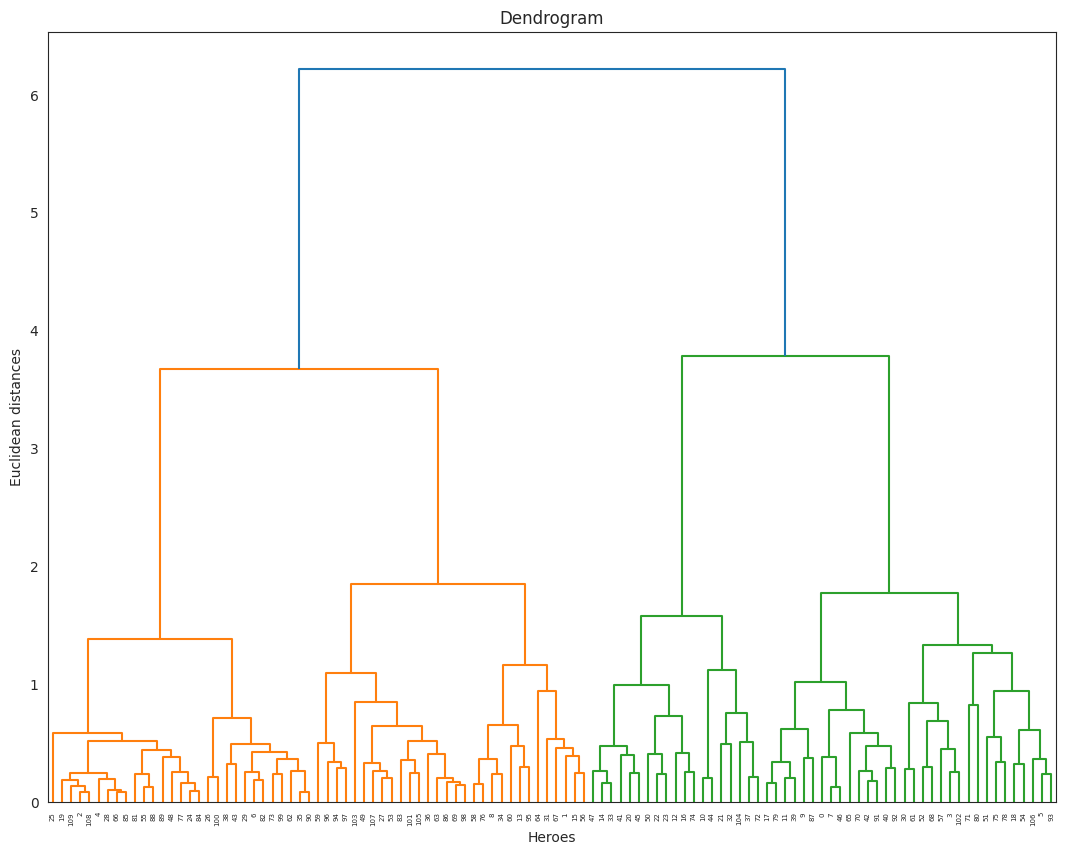

In [ ]:
# dendrogram
sns.set_style(style='white')
plt.figure(figsize=(13,10))
plt.title('Dendrogram')
plt.ylabel("Euclidean distances")
plt.xlabel('Heroes')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

- 5 is the optimal number of clusters

#### Training the Hierarchical Clustering model on the dataset

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
players_clus_avg.columns

Index(['hero_id', 'name', 'gold_spent', 'gold_per_min', 'xp_per_min',
       'hero_damage', 'tower_damage', 'kda', 'level', 'mid_lane', 'off_lane',
       'safe_lane'],
      dtype='object')

In [ ]:
heroes_clusters = pd.concat([pd.DataFrame(players_clus_avg[['hero_id', 'name']]), \
                             pd.DataFrame(X, columns=['gold_spent_norm', 'gold_per_min_norm', 'xp_per_min_norm', \
                                                      'hero_damage_norm', 'tower_damage_norm', \
                                                      'kda_norm', 'level_norm', 'mid_lane', 'off_lane', 'safe_lane']), \
                        pd.DataFrame(y_hc, columns=['hero_cluster'])], axis=1)
heroes_clusters.head()

hero_id            name  gold_spent_norm  gold_per_min_norm  \
0        1       Anti-Mage         0.685482           0.631889   
1        2             Axe         0.287203           0.266786   
2        3            Bane         0.082373           0.018423   
3        4     Bloodseeker         0.442432           0.379415   
4        5  Crystal Maiden         0.115513           0.064334   

   xp_per_min_norm  hero_damage_norm  tower_damage_norm  kda_norm  level_norm  \
0         0.742404          0.301816           0.798866  0.576638    0.836996   
1         0.368661          0.393115           0.071671  0.226141    0.495349   
2         0.079851          0.182782           0.051581  0.316848    0.163321   
3         0.509772          0.472113           0.347300  0.248261    0.681737   
4         0.107648          0.232267           0.026092  0.252156    0.193675   

   mid_lane  off_lane  safe_lane  hero_cluster  
0  0.000000  0.083155   1.000000             1  
1  0.000000  0.489577   0.089122             0  
2  0.115825  0.297465   0.641193             3  
3  0.155892  0.179493   0.323468             1  
4  0.000000  0.177239   0.661844             3

In [ ]:
heroes_clusters.shape # correct

(110, 13)

In [ ]:
heroes_clusters.hero_cluster.value_counts(normalize=True).sort_index()

0    0.272727
1    0.290909
2    0.172727
3    0.263636
Name: hero_cluster, dtype: float64

In [ ]:
pd.DataFrame(heroes_clusters.hero_cluster.value_counts(normalize=True)).apply(lambda x: x * 100).applymap('{:.2f}%'.format).sort_index()

hero_cluster
0       27.27%
1       29.09%
2       17.27%
3       26.36%

In [ ]:
na.summary(heroes_clusters).T # No NAs

NA count  NA, % (per column)  NA, % (of all NAs)  \
hero_id                 0.0                 0.0                 0.0   
name                    0.0                 0.0                 0.0   
gold_spent_norm         0.0                 0.0                 0.0   
gold_per_min_norm       0.0                 0.0                 0.0   
xp_per_min_norm         0.0                 0.0                 0.0   
hero_damage_norm        0.0                 0.0                 0.0   
tower_damage_norm       0.0                 0.0                 0.0   
kda_norm                0.0                 0.0                 0.0   
level_norm              0.0                 0.0                 0.0   
mid_lane                0.0                 0.0                 0.0   
off_lane                0.0                 0.0                 0.0   
safe_lane               0.0                 0.0                 0.0   
hero_cluster            0.0                 0.0                 0.0   

                   NA unique (per column)  NA unique, % (per column)  \
hero_id                               0.0                        0.0   
name                                  0.0                        0.0   
gold_spent_norm                       0.0                        0.0   
gold_per_min_norm                     0.0                        0.0   
xp_per_min_norm                       0.0                        0.0   
hero_damage_norm                      0.0                        0.0   
tower_damage_norm                     0.0                        0.0   
kda_norm                              0.0                        0.0   
level_norm                            0.0                        0.0   
mid_lane                              0.0                        0.0   
off_lane                              0.0                        0.0   
safe_lane                             0.0                        0.0   
hero_cluster                          0.0                        0.0   

                   Rows left after dropna()  Rows left after dropna(), %  
hero_id                               110.0                        100.0  
name                                  110.0                        100.0  
gold_spent_norm                       110.0                        100.0  
gold_per_min_norm                     110.0                        100.0  
xp_per_min_norm                       110.0                        100.0  
hero_damage_norm                      110.0                        100.0  
tower_damage_norm                     110.0                        100.0  
kda_norm                              110.0                        100.0  
level_norm                            110.0                        100.0  
mid_lane                              110.0                        100.0  
off_lane                              110.0                        100.0  
safe_lane                             110.0                        100.0  
hero_cluster                          110.0                        100.0

In [ ]:
# for mean cluster profiles plot (see the end of this notebook)
heroes_clusters_avg = pd.concat([players_clus_avg, pd.DataFrame(y_hc, columns=['hero_cluster'])], axis=1)
heroes_clusters_avg.head()

hero_id            name    gold_spent  gold_per_min  xp_per_min  \
0        1       Anti-Mage  19535.906769    554.192742  580.392827   
1        2             Axe  13129.112150    400.109107  442.938274   
2        3            Bane   9834.171563    295.293380  336.720329   
3        4     Bloodseeker  15626.151894    447.641746  494.835927   
4        5  Crystal Maiden  10367.259750    314.668876  346.943411   

    hero_damage  tower_damage       kda      level  mid_lane  off_lane  \
0  10162.878033   3081.401767  4.229892  20.574819      0.00      7.38   
1  11945.333188    453.616605  2.719573  18.033254      0.00     43.45   
2   7838.933803    381.018801  3.110437  15.563259     10.32     26.40   
3  13487.634641   1449.624831  2.814891  19.419824     13.89     15.93   
4   8805.037726    288.910018  2.831672  15.789064      0.00     15.73   

   safe_lane  hero_cluster  
0      90.55             1  
1       8.07             0  
2      58.06             3  
3      29.29             1  
4      59.93             3

In [ ]:
heroes_clusters_avg.shape # correct

(110, 13)

In [ ]:
heroes_clusters_avg.hero_cluster.value_counts(normalize=True).sort_index() # correct

0    0.272727
1    0.290909
2    0.172727
3    0.263636
Name: hero_cluster, dtype: float64

In [ ]:
na.summary(heroes_clusters_avg).T

NA count  NA, % (per column)  NA, % (of all NAs)  \
hero_id            0.0                 0.0                 0.0   
name               0.0                 0.0                 0.0   
gold_spent         0.0                 0.0                 0.0   
gold_per_min       0.0                 0.0                 0.0   
xp_per_min         0.0                 0.0                 0.0   
hero_damage        0.0                 0.0                 0.0   
tower_damage       0.0                 0.0                 0.0   
kda                0.0                 0.0                 0.0   
level              0.0                 0.0                 0.0   
mid_lane           0.0                 0.0                 0.0   
off_lane           0.0                 0.0                 0.0   
safe_lane          0.0                 0.0                 0.0   
hero_cluster       0.0                 0.0                 0.0   

              NA unique (per column)  NA unique, % (per column)  \
hero_id                          0.0                        0.0   
name                             0.0                        0.0   
gold_spent                       0.0                        0.0   
gold_per_min                     0.0                        0.0   
xp_per_min                       0.0                        0.0   
hero_damage                      0.0                        0.0   
tower_damage                     0.0                        0.0   
kda                              0.0                        0.0   
level                            0.0                        0.0   
mid_lane                         0.0                        0.0   
off_lane                         0.0                        0.0   
safe_lane                        0.0                        0.0   
hero_cluster                     0.0                        0.0   

              Rows left after dropna()  Rows left after dropna(), %  
hero_id                          110.0                        100.0  
name                             110.0                        100.0  
gold_spent                       110.0                        100.0  
gold_per_min                     110.0                        100.0  
xp_per_min                       110.0                        100.0  
hero_damage                      110.0                        100.0  
tower_damage                     110.0                        100.0  
kda                              110.0                        100.0  
level                            110.0                        100.0  
mid_lane                         110.0                        100.0  
off_lane                         110.0                        100.0  
safe_lane                        110.0                        100.0  
hero_cluster                     110.0                        100.0

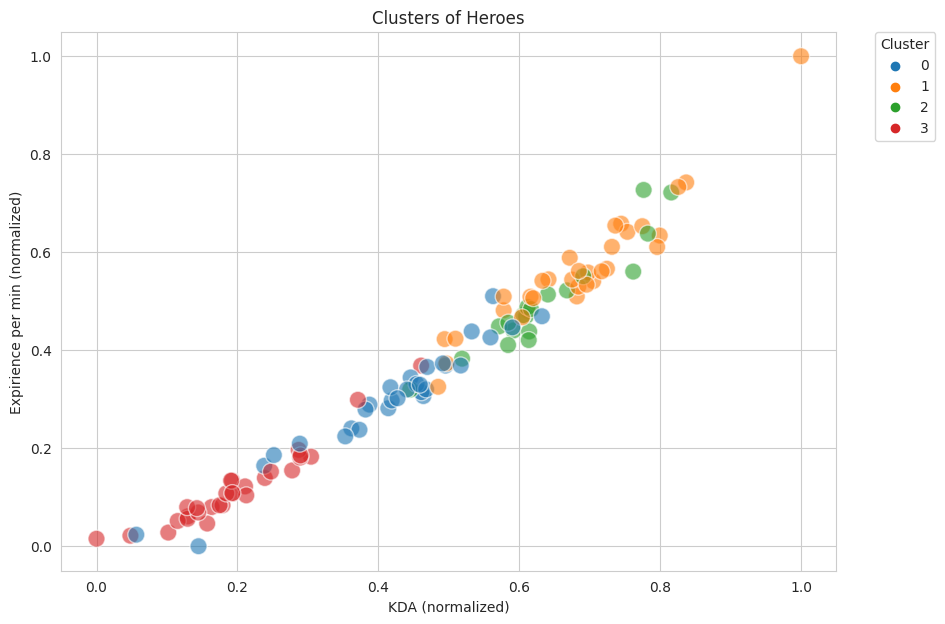

In [ ]:
plt.figure(figsize=(10,7))

sns.set_style(style='whitegrid')

sns.scatterplot(
    data=heroes_clusters,
    x='level_norm',
    y='xp_per_min_norm',
    hue='hero_cluster',
    palette='tab10',
    s=150,
    alpha=0.6,
    )

plt.title('Clusters of Heroes')
plt.xlabel('KDA (normalized)')
plt.ylabel('Expirience per min (normalized)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Cluster")
plt.show()

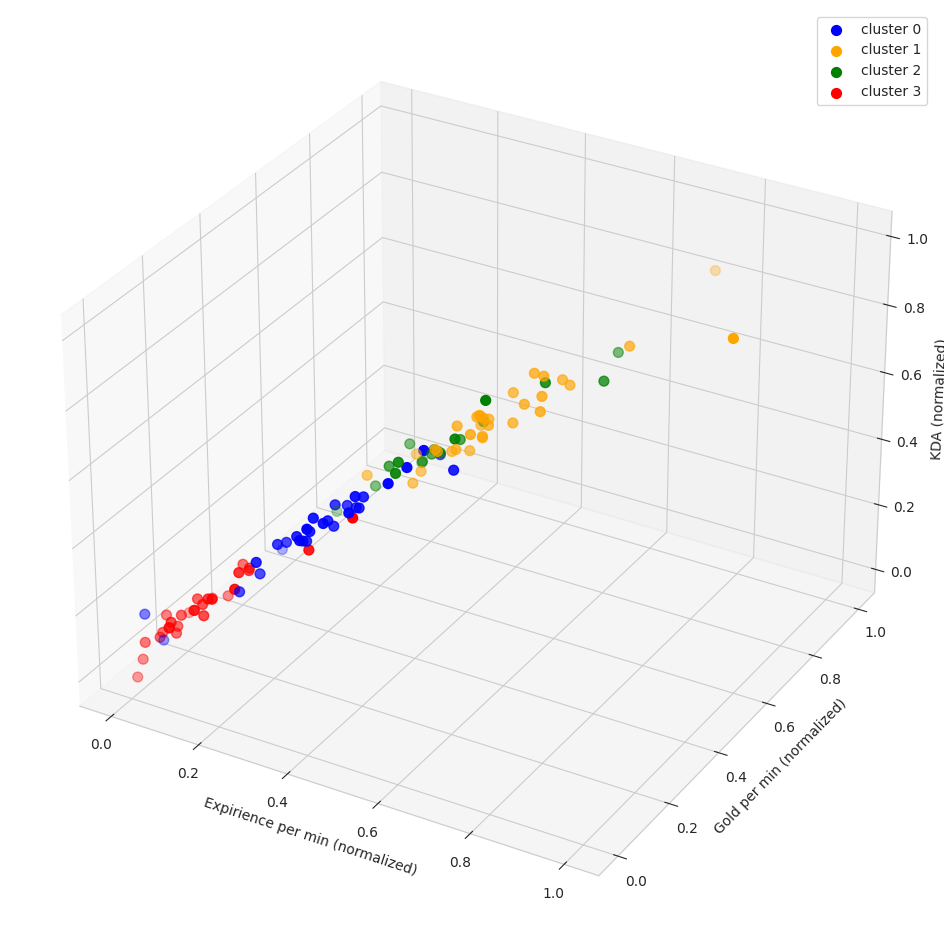

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zs=heroes_clusters.query('hero_cluster == 0')['level_norm'],
           xs=heroes_clusters.query('hero_cluster == 0')['xp_per_min_norm'],
           ys=heroes_clusters.query('hero_cluster == 0')['gold_per_min_norm'], s = 50 , color = 'blue', label = "cluster 0")
ax.scatter(zs=heroes_clusters.query('hero_cluster == 1')['level_norm'],
           xs=heroes_clusters.query('hero_cluster == 1')['xp_per_min_norm'],
           ys=heroes_clusters.query('hero_cluster == 1')['gold_per_min_norm'], s = 50 , color = 'orange', label = "cluster 1")
ax.scatter(zs=heroes_clusters.query('hero_cluster == 2')['level_norm'],
           xs=heroes_clusters.query('hero_cluster == 2')['xp_per_min_norm'],
           ys=heroes_clusters.query('hero_cluster == 2')['gold_per_min_norm'], s = 50 , color = 'green', label = "cluster 2")
ax.scatter(zs=heroes_clusters.query('hero_cluster == 3')['level_norm'],
           xs=heroes_clusters.query('hero_cluster == 3')['xp_per_min_norm'],
           ys=heroes_clusters.query('hero_cluster == 3')['gold_per_min_norm'], s = 50 , color = 'red', label = "cluster 3")
#ax.scatter(zs=heroes_clusters.query('hero_cluster == 4')['level_norm'],
           #xs=heroes_clusters.query('hero_cluster == 4')['xp_per_min_norm'],
           #ys=heroes_clusters.query('hero_cluster == 4')['gold_per_min_norm'], s = 50 , color = 'purple', label = "cluster 4", )
ax.set_zlabel('KDA (normalized)')
ax.set_xlabel('Expirience per min (normalized)')
ax.set_ylabel('Gold per min (normalized)')
ax.legend()
plt.show()

In [ ]:
heroes_clusters.to_csv('/content/drive/MyDrive/dota2_project/cluster_analysis_data/heroes_clusters.csv', index=False) # saving

In [ ]:
heroes_clusters_avg.to_csv('/content/drive/MyDrive/dota2_project/cluster_analysis_data/heroes_clusters_avg.csv', index=False) # saving

#### Descriptions of hero clusters by player behaviour

In [ ]:
heroes_clusters.hero_id.nunique(), players_clus.hero_id.nunique()

(110, 110)

In [ ]:
sorted(heroes_clusters.hero_id.unique()) == sorted(players_clus.hero_id.unique())
# All hero IDs contain in both DFs
# So, it is possible to apply FULL OUTER JOIN

True

In [ ]:
query = 'SELECT h.hero_id AS hero_id, p.gold_spent, gold_per_min, \
              	xp_per_min,	hero_damage, tower_damage, kda, level, \
                h.hero_cluster AS hero_cluster \
           FROM players_clus p JOIN heroes_clusters h \
             ON p.hero_id = h.hero_id'

players_clusters = pysqldf(query)
players_clusters.head()

hero_id  gold_spent  gold_per_min  xp_per_min  hero_damage  tower_damage  \
0       86       10960           347         362         8690           143   
1       51       17760           494         659        23747           423   
2       83       12195           350         385         4217           399   
3       11       22505           599         605        14832          6055   
4       67       23825           613         762        33740          1833   

         kda  level  hero_cluster  
0   9.000000     16             3  
1  10.333333     22             0  
2   3.750000     17             3  
3   6.750000     21             2  
4  12.333333     24             1

In [ ]:
print(players_clusters.shape) # correct
print(players_clusters.hero_id.nunique()) # correct

(499963, 9)
110


In [ ]:
na.summary(players_clusters).T # no NAs

NA count  NA, % (per column)  NA, % (of all NAs)  \
hero_id            0.0                 0.0                 0.0   
gold_spent         0.0                 0.0                 0.0   
gold_per_min       0.0                 0.0                 0.0   
xp_per_min         0.0                 0.0                 0.0   
hero_damage        0.0                 0.0                 0.0   
tower_damage       0.0                 0.0                 0.0   
kda                0.0                 0.0                 0.0   
level              0.0                 0.0                 0.0   
hero_cluster       0.0                 0.0                 0.0   

              NA unique (per column)  NA unique, % (per column)  \
hero_id                          0.0                        0.0   
gold_spent                       0.0                        0.0   
gold_per_min                     0.0                        0.0   
xp_per_min                       0.0                        0.0   
hero_damage                      0.0                        0.0   
tower_damage                     0.0                        0.0   
kda                              0.0                        0.0   
level                            0.0                        0.0   
hero_cluster                     0.0                        0.0   

              Rows left after dropna()  Rows left after dropna(), %  
hero_id                       499963.0                        100.0  
gold_spent                    499963.0                        100.0  
gold_per_min                  499963.0                        100.0  
xp_per_min                    499963.0                        100.0  
hero_damage                   499963.0                        100.0  
tower_damage                  499963.0                        100.0  
kda                           499963.0                        100.0  
level                         499963.0                        100.0  
hero_cluster                  499963.0                        100.0

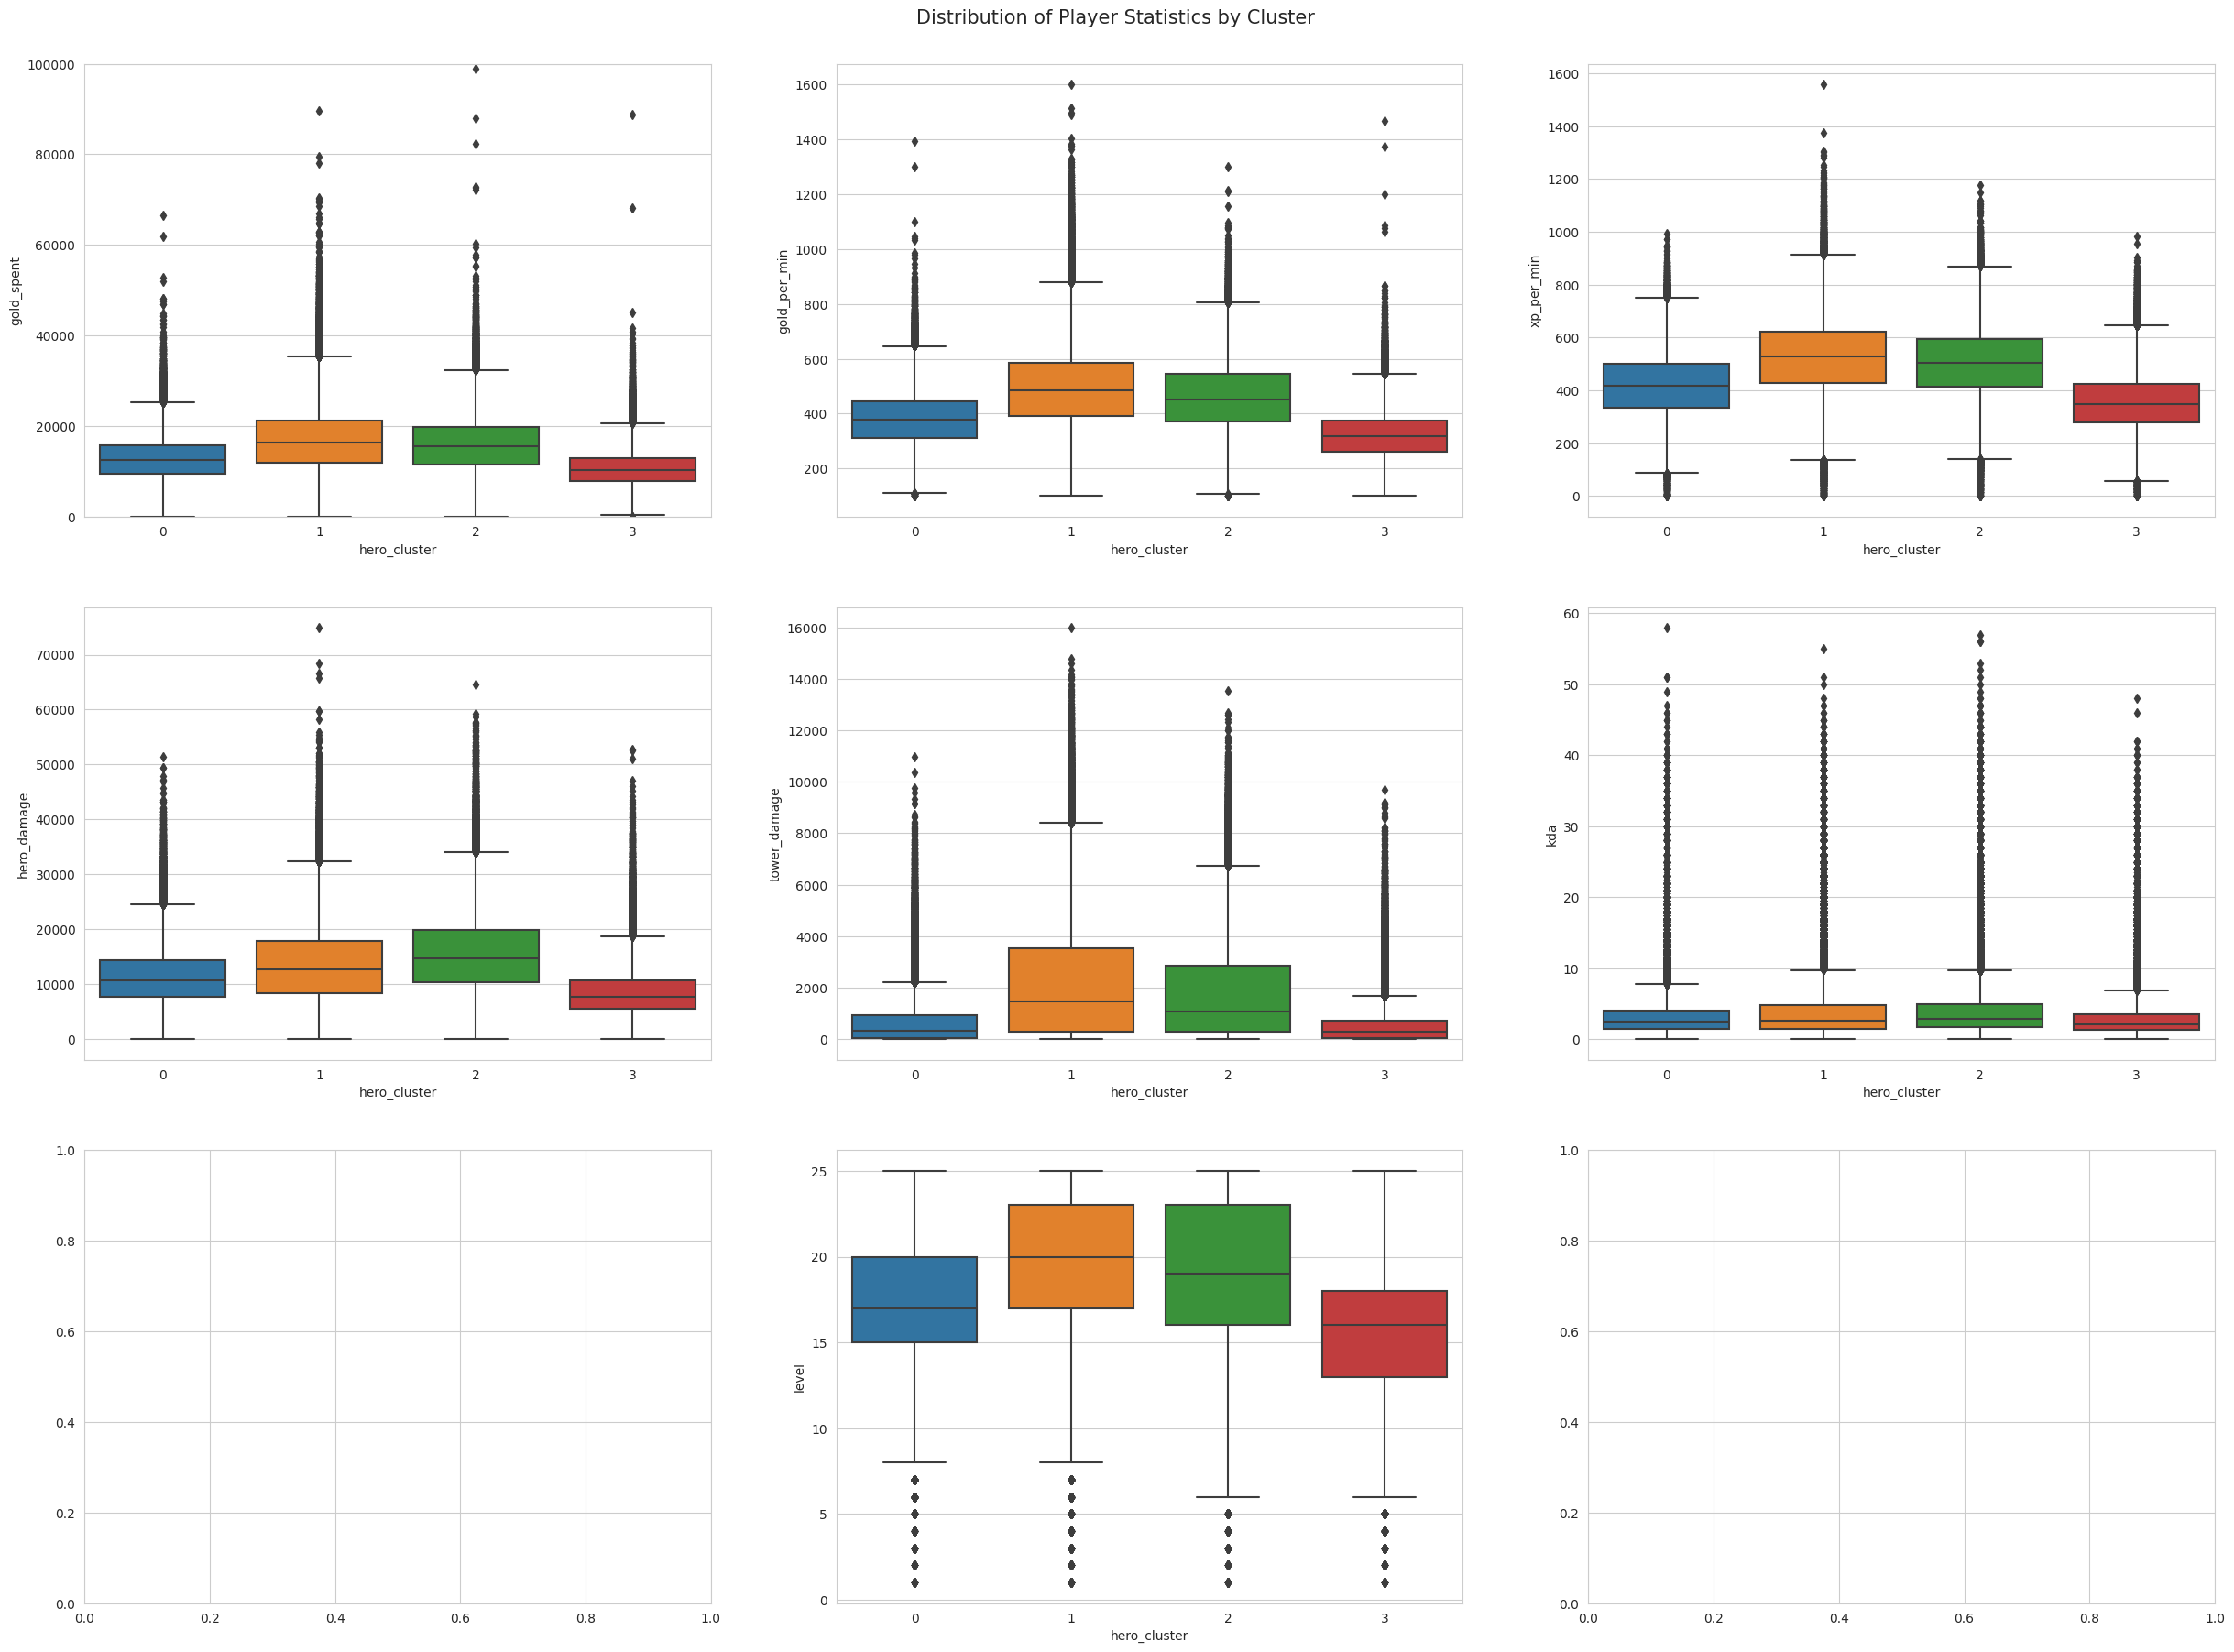

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
sns.boxplot(y='gold_spent', x='hero_cluster', data=players_clusters, ax=axes[0, 0])
axes[0, 0].set_ylim(0, 100000)
sns.boxplot(y='gold_per_min', x='hero_cluster', data=players_clusters, ax=axes[0, 1])
sns.boxplot(y='xp_per_min', x='hero_cluster', data=players_clusters, ax=axes[0, 2])
sns.boxplot(y='hero_damage', x='hero_cluster', data=players_clusters, ax=axes[1, 0])
sns.boxplot(y='tower_damage', x='hero_cluster', data=players_clusters, ax=axes[1, 1])
sns.boxplot(y='kda', x='hero_cluster', data=players_clusters, ax=axes[1, 2])
sns.boxplot(y='level', x='hero_cluster', data=players_clusters, ax=axes[2, 1])
plt.subplots_adjust(top=0.95)
fig.suptitle('Distribution of Player Statistics by Cluster', fontsize=15)
plt.show()

- It seems there may be significant differences between clusters considering spending gold, obtaining gold and expirience per min and dealing damage to towers.
- Parametric or nonparametric statistical tests for difference between groups is reqired.
- So, the first step is to check for normality of distributions of each subsample (regarding each variable).

##### Formal tests to check for difference between clusters by playing behaviour

In [ ]:
# function to check for normality of distributions of subsamples with Q-Q plots
def get_qqplots(variable):
  fig, axes = plt.subplots(1, 4, figsize=(27, 5))
  for i in range(4):
    sm.qqplot(np.array(players_clusters[players_clusters['hero_cluster']==i][variable]), line='45', fit=True, ax=axes[i])
    axes[i].set_title(variable + " " + "(" + "cluster" + str(i) + ")")
  plt.show()

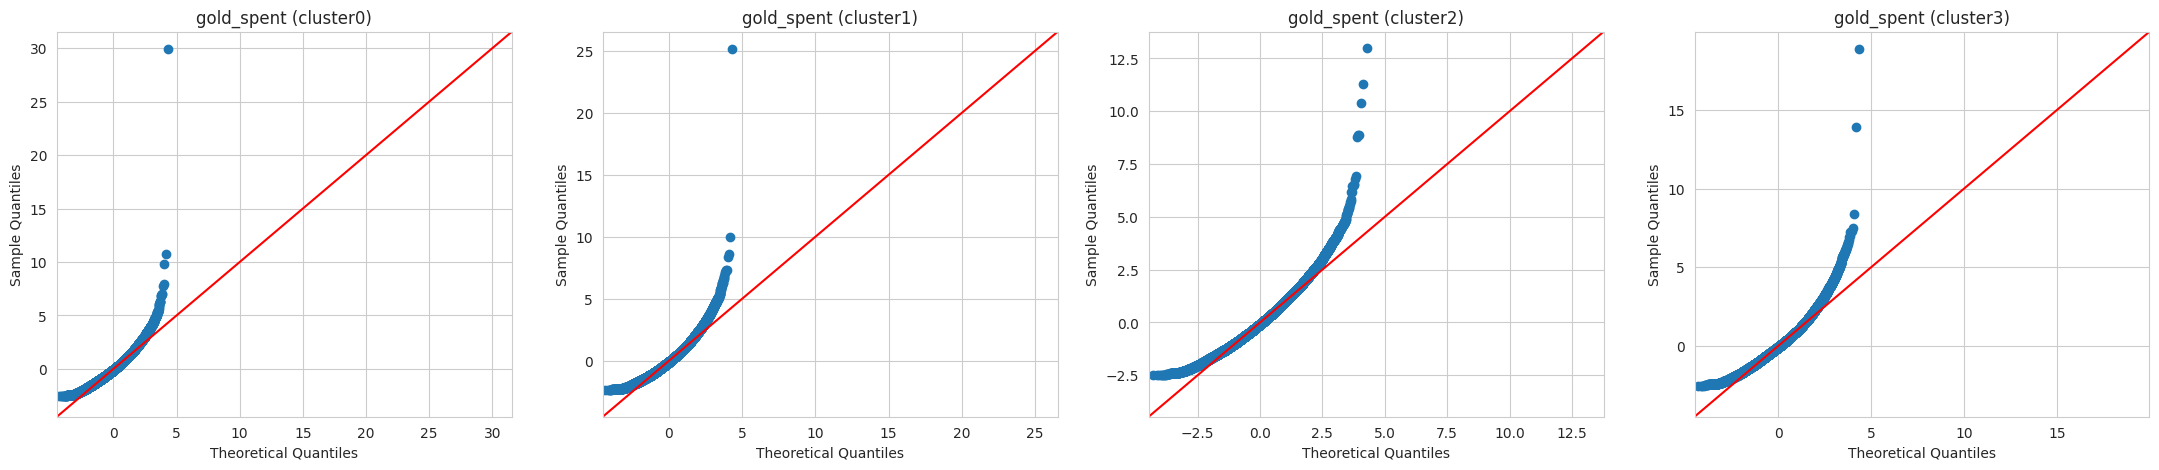

In [ ]:
get_qqplots('gold_spent')

- Distribution of all subsamples are not normal => Kruskal-Wallis test

In [ ]:
# function to extract subsamples for formal tests
def get_subsamples(variable):
  samples = []
  for i in range(5):
    l = players_clusters[players_clusters['hero_cluster']==i][variable]
    samples.append(l)
  return samples

In [ ]:
# function to extract medians from subsamples
def get_medians(variable):
  for i in range(5):
    median = players_clusters[players_clusters['hero_cluster']==i][variable].median()
    print("Median in subsample" + ' ' + '(' + variable + ':' + ' ' + 'cluster' + ' ' + str(i) +')' + ' ' + 'is', median)

In [ ]:
samples = get_subsamples('gold_spent')
H, p = stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])
stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])

KruskalResult(statistic=nan, pvalue=nan)

*There is significant difference in spending gold between clusters*

Post hoc analysis with Dunn's test is required to establish which groups are distinct, the Kruskal-Wallis test yields statistically significant findings

In [ ]:
get_medians('gold_spent')

Median in subsample (gold_spent: cluster 0) is 12400.0
Median in subsample (gold_spent: cluster 1) is 16420.0
Median in subsample (gold_spent: cluster 2) is 15425.0
Median in subsample (gold_spent: cluster 3) is 10285.0
Median in subsample (gold_spent: cluster 4) is nan


In [ ]:
sp.posthoc_dunn(players_clusters, 'gold_spent', 'hero_cluster', 'holm').apply(lambda x: x.round(4))

0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

*There are signifficant differences between all the groups*

Effect size for the Kruskal-Wallis test is epsilon-square:

                          𝜼² = (H - k + 1) / (n - k)
where
- H is the Kruskal-Wallis test statistic,
- k is the number of groups,
- n is the total sample size.

Generally, values of 𝜼² around 0.01 are considered small, values around 0.06 are considered medium, and values above 0.14 are considered large.

In [ ]:
# effect size (epsilon-squared)
k = 5  # number of groups
n = len(samples[0]) + len(samples[1]) + len(samples[2]) + len(samples[3]) + len(samples[4])  # total sample size
epsilon_squared = (H - k + 1) / (n - k)

print('Epsilon-squared:', epsilon_squared)

Epsilon-squared: nan


*The effect size is large*

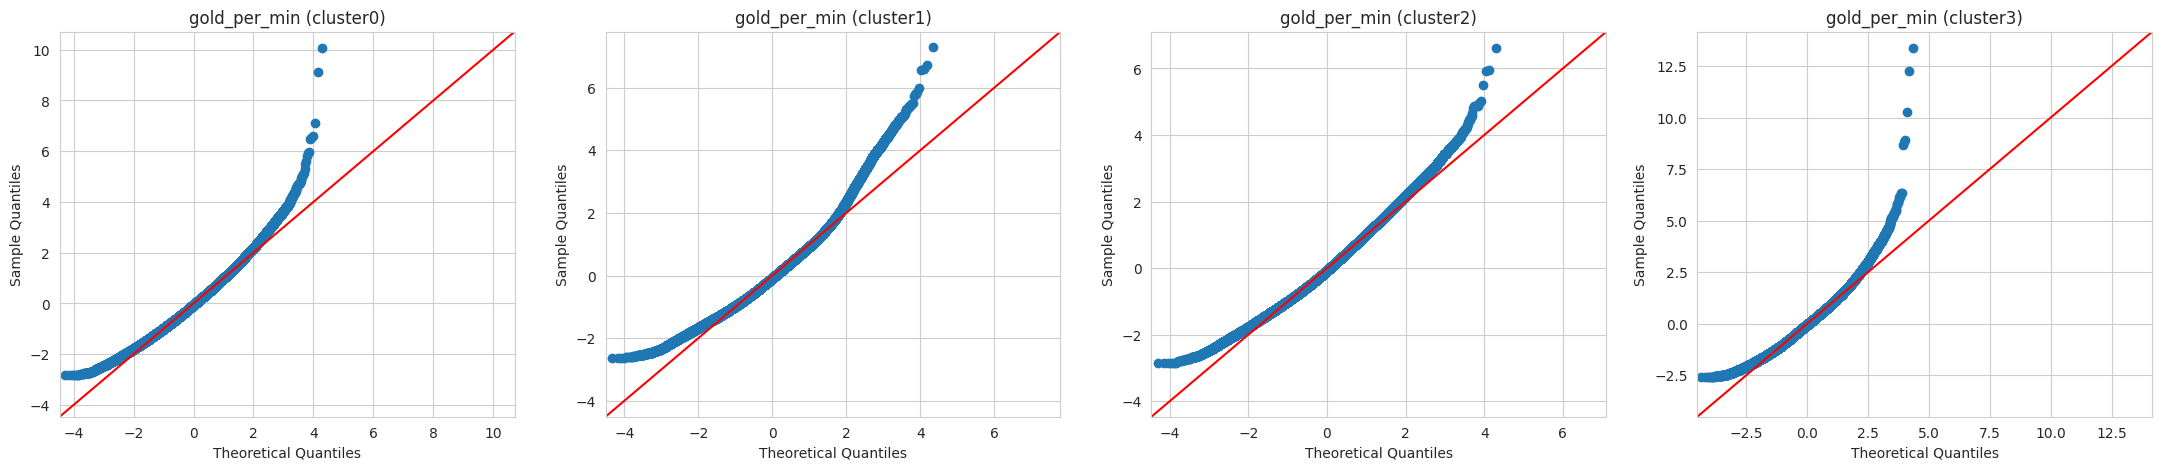

In [ ]:
get_qqplots('gold_per_min')

- Distribution of all subsamples are not normal => Kruskal-Wallis test

In [ ]:
samples = get_subsamples('gold_per_min')
H, p = stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])
stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])

KruskalResult(statistic=nan, pvalue=nan)

*There is significant difference in obtaining gold per min between clusters*

Post hoc analysis with Dunn's test is required to establish which groups are distinct, the Kruskal-Wallis test yields statistically significant findings

In [ ]:
get_medians('gold_per_min')

Median in subsample (gold_per_min: cluster 0) is 377.0
Median in subsample (gold_per_min: cluster 1) is 485.0
Median in subsample (gold_per_min: cluster 2) is 452.0
Median in subsample (gold_per_min: cluster 3) is 318.0
Median in subsample (gold_per_min: cluster 4) is nan


In [ ]:
sp.posthoc_dunn(players_clusters, 'gold_per_min', 'hero_cluster', 'holm').apply(lambda x: x.round(4))

0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

*There are signifficant differences between all the groups*

In [ ]:
# effect size (epsilon-squared)
k = 5  # number of groups
n = len(samples[0]) + len(samples[1]) + len(samples[2]) + len(samples[3]) + len(samples[4])  # total sample size
epsilon_squared = (H - k + 1) / (n - k)

print('Epsilon-squared:', epsilon_squared)

Epsilon-squared: nan


*The effect size is large*

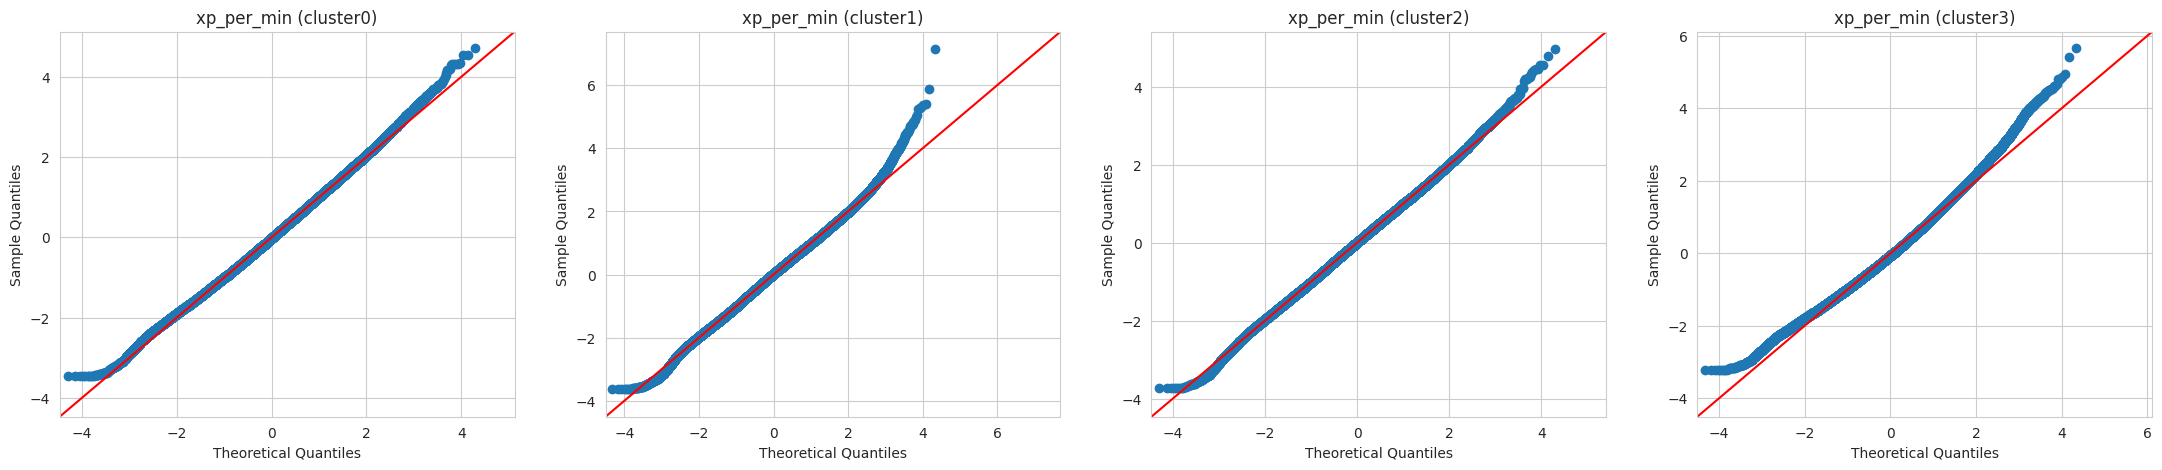

In [ ]:
get_qqplots('xp_per_min')

- Distributions almost look like normal (except subsamples of clusters 0 and 2) - in this case right tail of quantiles is above the line of theoretical normal distribution). But this tale is not located far away from the line of theoretical normal distribution. So, one-way ANOVA test may be used.

In [ ]:
# check for equality of variances with Levene test
samples = get_subsamples('xp_per_min')
levene(samples[0], samples[1], samples[2], samples[3], samples[4])

LeveneResult(statistic=nan, pvalue=nan)

Since variances are not equaled, I use Welch's ANOVA, which is a modification of the traditional ANOVA that accounts for unequal variances.

In [ ]:
# Perform the Welch's ANOVA test
pg.welch_anova(data=players_clusters, dv='xp_per_min', between='hero_cluster')

Source  ddof1          ddof2             F  p-unc       np2
0  hero_cluster      3  271133.169272  52001.701532    0.0  0.228028

In [ ]:
for i in range(5):
  mean = players_clusters[players_clusters['hero_cluster']==i]['xp_per_min'].mean()
  print("Mean in subsample" + ' ' + '(' + 'xp_per_min' + ':' + ' ' + 'cluster' + ' ' + str(i) +')' + ' ' + 'is', mean)

Mean in subsample (xp_per_min: cluster 0) is 419.7052721652725
Mean in subsample (xp_per_min: cluster 1) is 525.6425924569754
Mean in subsample (xp_per_min: cluster 2) is 504.47740095313884
Mean in subsample (xp_per_min: cluster 3) is 355.50979962932155
Mean in subsample (xp_per_min: cluster 4) is nan


There is signifficant difference in obtainin experience per min between groups (p-value = 0.00).

Effect size for ANOVA - Partial Eta Squared (η²):
- η² measures the proportion of variance in the dependent variable that is accounted for by the independent variable.
- Typical rule of thumb: Small effect = η² < 0.06, Medium effect = 0.06 ≤ η² < 0.14, Large effect = η² ≥ 0.14.

*So, the effect size is large (η² = 0.23).*

In [ ]:
# perform Tukey-Kramer post-hoc test
posthoc = mc.pairwise_tukeyhsd(endog=players_clusters['xp_per_min'], groups=players_clusters['hero_cluster'], alpha=0.05)
posthoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

**There are signifficant differences between all the groups.**

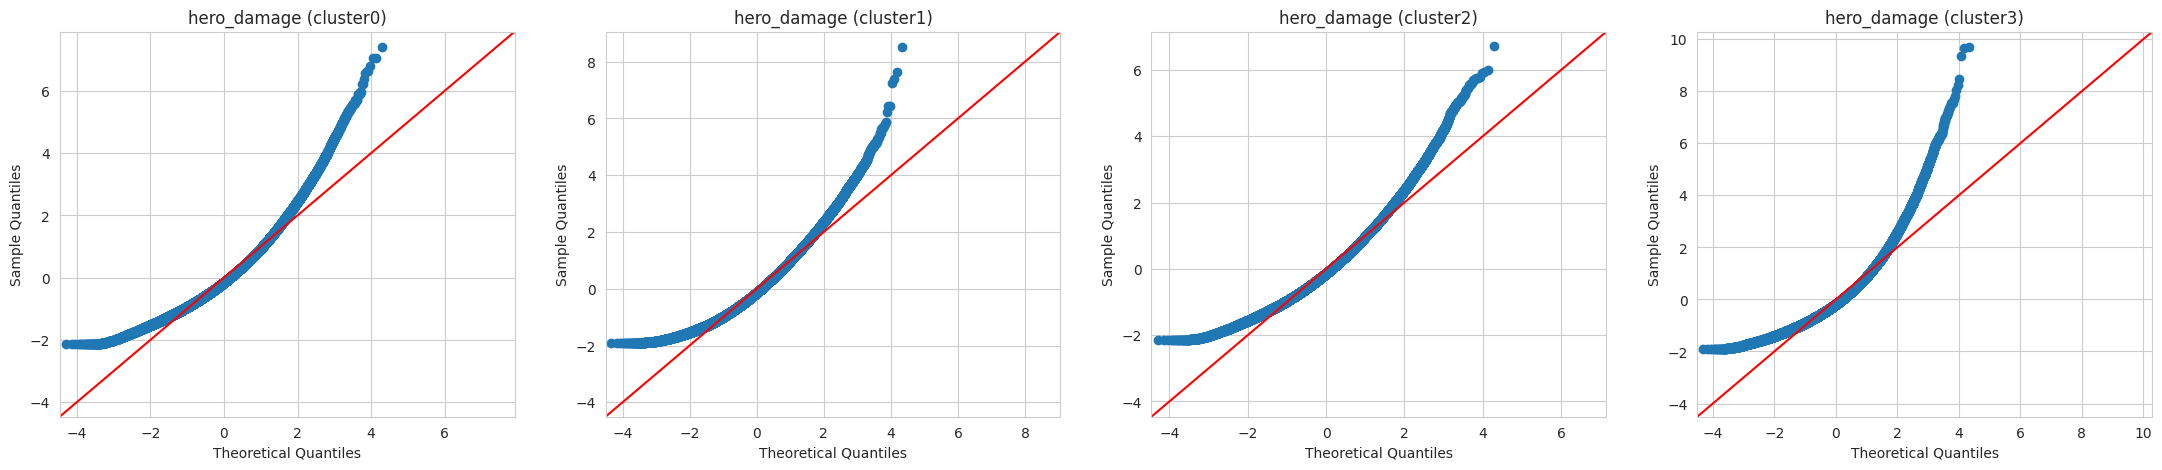

In [ ]:
get_qqplots('hero_damage')

- Distribution of all subsamples are not normal => Kruskal-Wallis test

In [ ]:
samples = get_subsamples('hero_damage')
H, p = stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])
stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])

KruskalResult(statistic=nan, pvalue=nan)

*There is significant difference in dealing damage  between clusters*

Post hoc analysis with Dunn's test is required to establish which groups are distinct, the Kruskal-Wallis test yields statistically significant findings

In [ ]:
get_medians('hero_damage')

Median in subsample (hero_damage: cluster 0) is 10669.0
Median in subsample (hero_damage: cluster 1) is 12662.0
Median in subsample (hero_damage: cluster 2) is 14690.0
Median in subsample (hero_damage: cluster 3) is 7773.0
Median in subsample (hero_damage: cluster 4) is nan


In [ ]:
sp.posthoc_dunn(players_clusters, 'hero_damage', 'hero_cluster', 'holm').apply(lambda x: x.round(4))

0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

*There are signifficant differences between all the groups*

In [ ]:
# effect size (epsilon-squared)
k = 5  # number of groups
n = len(samples[0]) + len(samples[1]) + len(samples[2]) + len(samples[3]) + len(samples[4])  # total sample size
epsilon_squared = (H - k + 1) / (n - k)

print('Epsilon-squared:', epsilon_squared)

Epsilon-squared: nan


*The effect size is large*

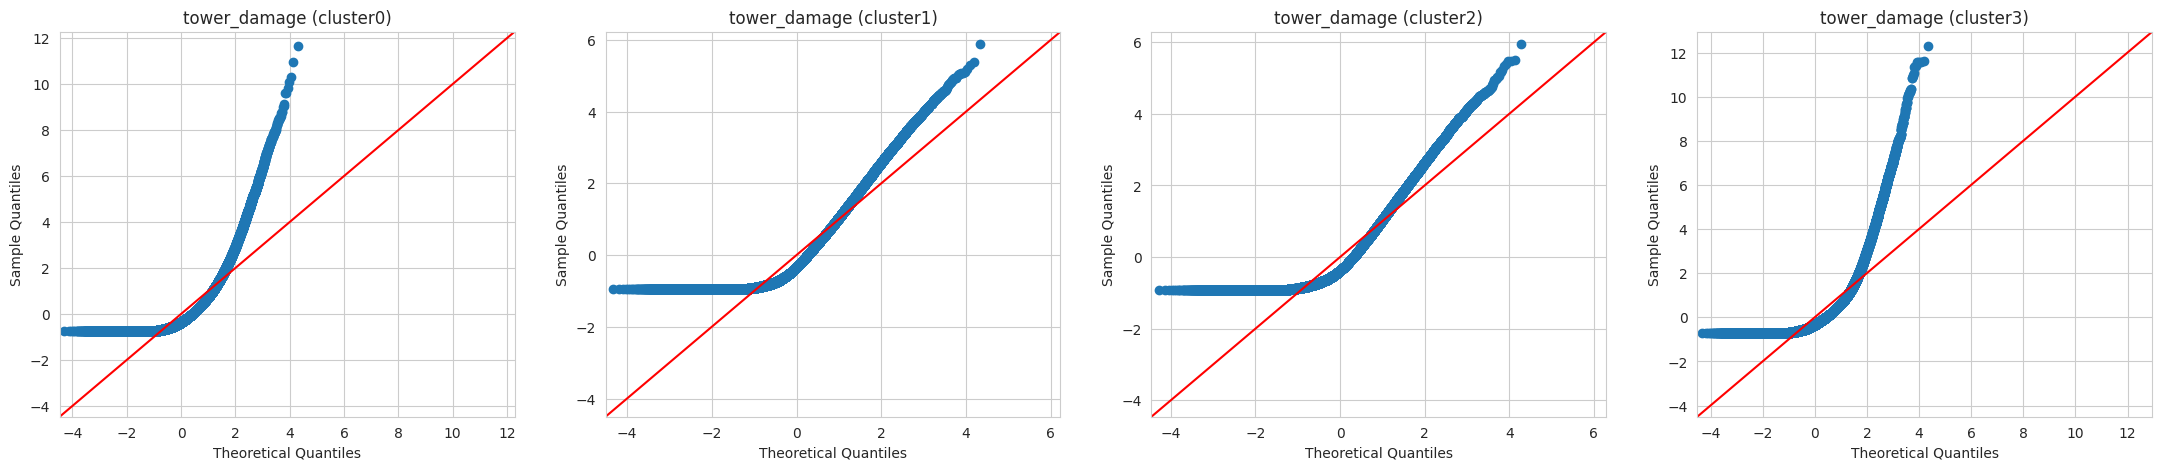

In [ ]:
get_qqplots('tower_damage')

- Distribution of all subsamples are not normal => Kruskal-Wallis test

In [ ]:
samples = get_subsamples('tower_damage')
H, p = stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])
stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])

KruskalResult(statistic=nan, pvalue=nan)

*There is significant difference in dealing damage to towers between clusters*

Post hoc analysis with Dunn's test is required to establish which groups are distinct, the Kruskal-Wallis test yields statistically significant findings

In [ ]:
get_medians('tower_damage')

Median in subsample (tower_damage: cluster 0) is 338.0
Median in subsample (tower_damage: cluster 1) is 1449.0
Median in subsample (tower_damage: cluster 2) is 1082.0
Median in subsample (tower_damage: cluster 3) is 278.0
Median in subsample (tower_damage: cluster 4) is nan


In [ ]:
sp.posthoc_dunn(players_clusters, 'tower_damage', 'hero_cluster', 'holm').apply(lambda x: x.round(4))

0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

*There are signifficant differences between all the groups*

In [ ]:
# effect size (epsilon-squared)
k = 5  # number of groups
n = len(samples[0]) + len(samples[1]) + len(samples[2]) + len(samples[3]) + len(samples[4])  # total sample size
epsilon_squared = (H - k + 1) / (n - k)

print('Epsilon-squared:', epsilon_squared)

Epsilon-squared: nan


*The effect size is large*

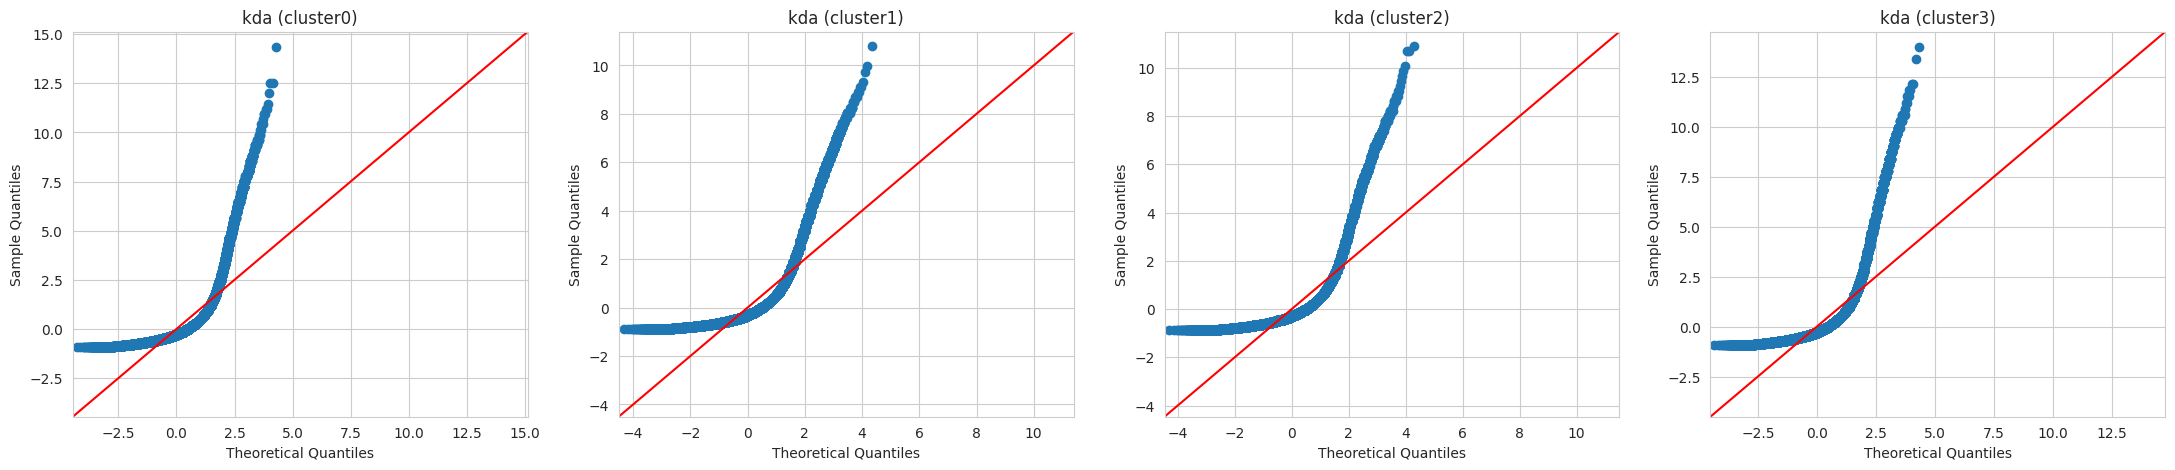

In [ ]:
get_qqplots('kda')

- Distribution of all subsamples are not normal => Kruskal-Wallis test

In [ ]:
samples = get_subsamples('kda')
H, p = stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])
stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])

KruskalResult(statistic=nan, pvalue=nan)

*There is significant difference in KDA between clusters*

Post hoc analysis with Dunn's test is required to establish which groups are distinct, the Kruskal-Wallis test yields statistically significant findings

In [ ]:
get_medians('kda')

Median in subsample (kda: cluster 0) is 2.4285714285714284
Median in subsample (kda: cluster 1) is 2.6363636363636362
Median in subsample (kda: cluster 2) is 2.8
Median in subsample (kda: cluster 3) is 2.090909090909091
Median in subsample (kda: cluster 4) is nan


In [ ]:
sp.posthoc_dunn(players_clusters, 'kda', 'hero_cluster', 'holm').apply(lambda x: x.round(4))

0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

*There are signifficant differences between all the groups*

In [ ]:
# effect size (epsilon-squared)
k = 5  # number of groups
n = len(samples[0]) + len(samples[1]) + len(samples[2]) + len(samples[3]) + len(samples[4])  # total sample size
epsilon_squared = (H - k + 1) / (n - k)

print('Epsilon-squared:', epsilon_squared)

Epsilon-squared: nan


*The effect size is small*

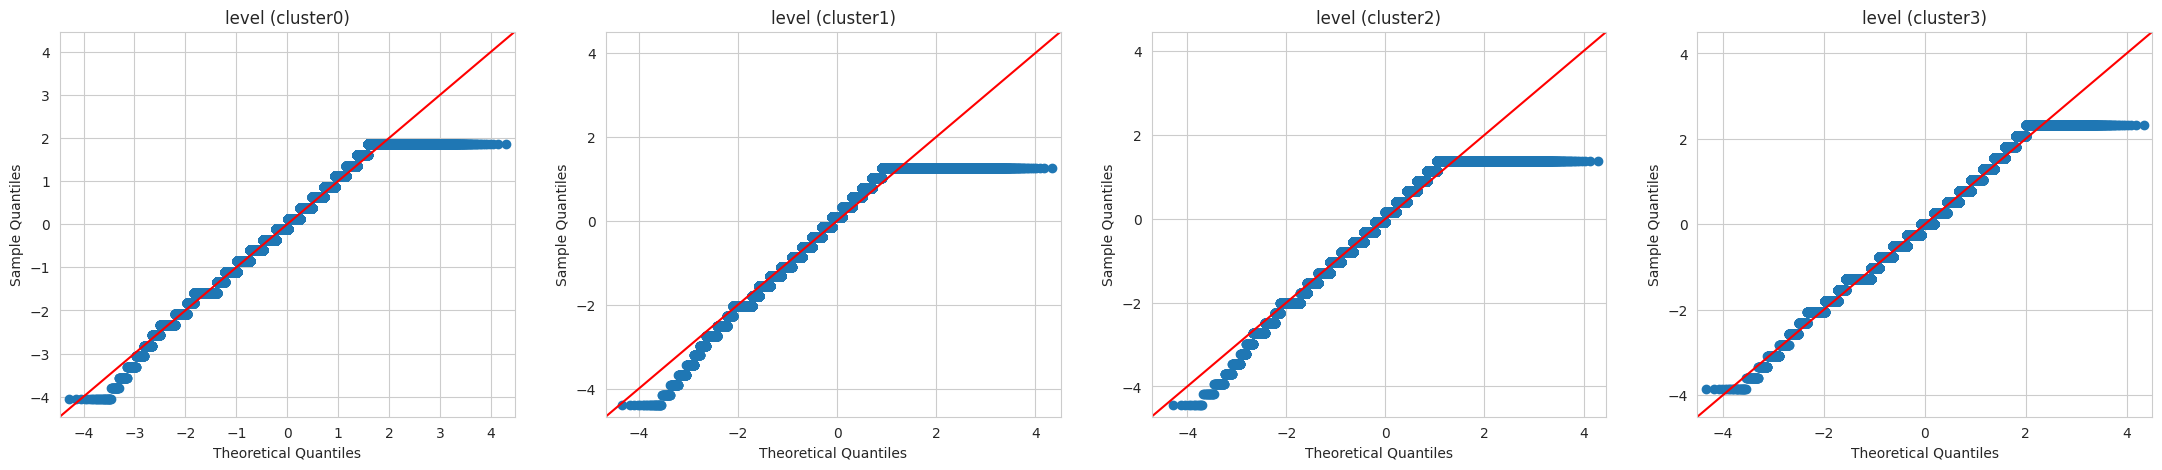

In [ ]:
get_qqplots('level')

- Distribution of all subsamples are not normal => Kruskal-Wallis test

In [ ]:
samples = get_subsamples('level')
H, p = stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])
stats.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4])

KruskalResult(statistic=nan, pvalue=nan)

*There is significant difference in obtaining maximum level between clusters*

Post hoc analysis with Dunn's test is required to establish which groups are distinct, the Kruskal-Wallis test yields statistically significant findings

In [ ]:
get_medians('level')

Median in subsample (level: cluster 0) is 17.0
Median in subsample (level: cluster 1) is 20.0
Median in subsample (level: cluster 2) is 19.0
Median in subsample (level: cluster 3) is 16.0
Median in subsample (level: cluster 4) is nan


In [ ]:
sp.posthoc_dunn(players_clusters, 'level', 'hero_cluster', 'holm').apply(lambda x: x.round(4))

0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

*There are signifficant differences between all the groups*

In [ ]:
# effect size (epsilon-squared)
k = 5  # number of groups
n = len(samples[0]) + len(samples[1]) + len(samples[2]) + len(samples[3]) + len(samples[4])  # total sample size
epsilon_squared = (H - k + 1) / (n - k)

print('Epsilon-squared:', epsilon_squared)

Epsilon-squared: nan


*The effect size is medium*

In [ ]:
players_clusters.to_csv('/content/drive/MyDrive/dota2_project/cluster_analysis_data/players_clusters.csv', index=False)

#### Which roles and attributes do match to hero clusters?

In [ ]:
heroes.head()

name  hero_id  localized_name  carry  support  \
0        npc_dota_hero_antimage        1       Anti-Mage   1.00     0.00   
1             npc_dota_hero_axe        2             Axe   0.33     0.00   
2            npc_dota_hero_bane        3            Bane   0.00     0.66   
3     npc_dota_hero_bloodseeker        4     Bloodseeker   0.33     0.00   
4  npc_dota_hero_crystal_maiden        5  Crystal Maiden   0.00     1.00   

   nuker  disabler  durable  escape  pusher  initiator     attribute  
0   0.33      0.00     0.00     1.0     0.0       0.00       agility  
1   0.00      0.66     1.00     0.0     0.0       1.00      strength  
2   0.33      1.00     0.33     0.0     0.0       0.00  intelligence  
3   0.33      0.33     0.00     0.0     0.0       0.33       agility  
4   0.66      0.66     0.00     0.0     0.0       0.00  intelligence

- Each role (from `carry` to `initiator`) contain only four classes: 0, 0.33, 0.66 and 1.00
- '0' means that a hero is not chosen for this role; '0.33' means that a hero might be taken for a role; '0.66' means that a hero is good at a certain role; '1.00' means that a hero is perfect for a role and definitely should be chosen for that role
- Meanwile, `attribute` contains primary attribute for each hero: strength, agility or intelligence.

In [ ]:
heroes = heroes.rename(columns={'escape': 'escape_role'}) # 'escape' is a service word for SQL Lite => rename

In [ ]:
query = "SELECT h.hero_id AS hero_id, localized_name, carry, support, nuker, \
                disabler, durable, escape_role, pusher, initiator, attribute, \
                hc.hero_cluster AS hero_cluster \
           FROM heroes h JOIN heroes_clusters hc \
             ON h.hero_id = hc.hero_id"

heroes_roles_clusters = pysqldf(query)
heroes_roles_clusters.head()

hero_id  localized_name  carry  support  nuker  disabler  durable  \
0        1       Anti-Mage   1.00     0.00   0.33      0.00     0.00   
1        2             Axe   0.33     0.00   0.00      0.66     1.00   
2        3            Bane   0.00     0.66   0.33      1.00     0.33   
3        4     Bloodseeker   0.33     0.00   0.33      0.33     0.00   
4        5  Crystal Maiden   0.00     1.00   0.66      0.66     0.00   

   escape_role  pusher  initiator     attribute  hero_cluster  
0          1.0     0.0       0.00       agility             1  
1          0.0     0.0       1.00      strength             0  
2          0.0     0.0       0.00  intelligence             3  
3          0.0     0.0       0.33       agility             1  
4          0.0     0.0       0.00  intelligence             3

In [ ]:
na.summary(heroes_roles_clusters).T # no NAs

NA count  NA, % (per column)  NA, % (of all NAs)  \
hero_id              0.0                 0.0                 0.0   
localized_name       0.0                 0.0                 0.0   
carry                0.0                 0.0                 0.0   
support              0.0                 0.0                 0.0   
nuker                0.0                 0.0                 0.0   
disabler             0.0                 0.0                 0.0   
durable              0.0                 0.0                 0.0   
escape_role          0.0                 0.0                 0.0   
pusher               0.0                 0.0                 0.0   
initiator            0.0                 0.0                 0.0   
attribute            0.0                 0.0                 0.0   
hero_cluster         0.0                 0.0                 0.0   

                NA unique (per column)  NA unique, % (per column)  \
hero_id                            0.0                        0.0   
localized_name                     0.0                        0.0   
carry                              0.0                        0.0   
support                            0.0                        0.0   
nuker                              0.0                        0.0   
disabler                           0.0                        0.0   
durable                            0.0                        0.0   
escape_role                        0.0                        0.0   
pusher                             0.0                        0.0   
initiator                          0.0                        0.0   
attribute                          0.0                        0.0   
hero_cluster                       0.0                        0.0   

                Rows left after dropna()  Rows left after dropna(), %  
hero_id                            110.0                        100.0  
localized_name                     110.0                        100.0  
carry                              110.0                        100.0  
support                            110.0                        100.0  
nuker                              110.0                        100.0  
disabler                           110.0                        100.0  
durable                            110.0                        100.0  
escape_role                        110.0                        100.0  
pusher                             110.0                        100.0  
initiator                          110.0                        100.0  
attribute                          110.0                        100.0  
hero_cluster                       110.0                        100.0

In [ ]:
print(heroes_roles_clusters.hero_cluster.nunique()) # correct
print(sorted(heroes_roles_clusters.hero_cluster.unique())) # correct

4
[0, 1, 2, 3]


In [ ]:
heroes_roles_clusters = heroes_roles_clusters.rename(columns={"escape_role": 'escape'})

In [ ]:
heroes_roles_clusters.to_csv('/content/drive/MyDrive/dota2_project/cluster_analysis_data/heroes_roles_clusters.csv', index=False)

In [ ]:
heroes_roles_clusters.head()

hero_id  localized_name  carry  support  nuker  disabler  durable  escape  \
0        1       Anti-Mage   1.00     0.00   0.33      0.00     0.00     1.0   
1        2             Axe   0.33     0.00   0.00      0.66     1.00     0.0   
2        3            Bane   0.00     0.66   0.33      1.00     0.33     0.0   
3        4     Bloodseeker   0.33     0.00   0.33      0.33     0.00     0.0   
4        5  Crystal Maiden   0.00     1.00   0.66      0.66     0.00     0.0   

   pusher  initiator     attribute  hero_cluster  
0     0.0       0.00       agility             1  
1     0.0       1.00      strength             0  
2     0.0       0.00  intelligence             3  
3     0.0       0.33       agility             1  
4     0.0       0.00  intelligence             3

In [ ]:
def get_roles_and_attribute(cluster_num):
  # roles rating in a cluster
  print(heroes_roles_clusters.query('hero_cluster == @cluster_num').iloc[:,2:10].sum().sort_values(ascending=False))
  print()
  # most common attribute in a cluster
  print(heroes_roles_clusters.query('hero_cluster == @cluster_num').iloc[:,10].apply(pd.Series.value_counts, normalize=True).sum().sort_values(ascending=False))
  print()
  # get examples of heroes
  print(heroes_roles_clusters.query('hero_cluster == @cluster_num')["localized_name"])
  print()
  # get probabailities for each category for all roles
  return heroes_roles_clusters.query('hero_cluster == @cluster_num').iloc[:,2:10].apply(pd.Series.value_counts, normalize=True).apply(lambda x: x*100) \
                                                             .applymap(lambda x: '{:.2f}%'.format(x) if not pd.isna(x) else x)

In [ ]:
get_roles_and_attribute(0)

initiator    15.59
disabler     13.20
durable      10.93
nuker        10.92
escape        7.28
pusher        3.98
carry         3.96
support       3.30
dtype: float64

strength        19.0
intelligence     7.0
agility          4.0
dtype: float64

1                    Axe
8                 Mirana
13                 Pudge
15             Sand King
27            Tidehunter
31                Enigma
34             Necrophos
36           Beastmaster
49             Clockwerk
53             Dark Seer
56           Enchantress
58         Night Stalker
59           Broodmother
60         Bounty Hunter
63              Batrider
64                  Chen
67                  Doom
69        Spirit Breaker
76            Brewmaster
83               Undying
86          Nyx Assassin
94     Centaur Warrunner
95                Magnus
96             Timbersaw
97           Bristleback
98                  Tusk
101          Elder Titan
103              Techies
105         Earth Spirit
107              Phoenix
Nam

carry support   nuker disabler durable  escape  pusher initiator
0.00  63.33%  80.00%  23.33%   16.67%  43.33%  56.67%  83.33%    30.00%
0.33  33.33%   6.67%  53.33%   33.33%  16.67%  20.00%     NaN    10.00%
0.66   3.33%  13.33%  13.33%   50.00%  26.67%  16.67%  10.00%    33.33%
1.00     NaN     NaN  10.00%      NaN  13.33%   6.67%   6.67%    26.67%

Offlaners. Third priority for gold and xp.

In [ ]:
get_roles_and_attribute(1)

carry        23.87
escape        9.62
pusher        8.28
durable       8.26
disabler      7.59
nuker         5.61
initiator     4.96
support       0.99
dtype: float64

agility         21.0
strength        10.0
intelligence     1.0
dtype: float64

0             Anti-Mage
3           Bloodseeker
5           Drow Ranger
7            Juggernaut
9             Morphling
11       Phantom Lancer
17                 Sven
18                 Tiny
30                 Riki
39        Faceless Void
40          Wraith King
42     Phantom Assassin
46                 Luna
51     Nature's Prophet
52          Lifestealer
54               Clinkz
57               Huskar
61               Weaver
65              Spectre
68                 Ursa
70           Gyrocopter
71            Alchemist
75                Lycan
78           Lone Druid
79         Chaos Knight
80                Meepo
87           Naga Siren
91                Slark
92               Medusa
93        Troll Warlord
102    Legion Commander
106      

carry support   nuker disabler durable  escape  pusher initiator
0.00     NaN  90.62%  56.25%   46.88%  50.00%  50.00%  56.25%    65.62%
0.33   9.38%   9.38%  34.38%   34.38%  25.00%  25.00%  18.75%    25.00%
0.66  56.25%     NaN   9.38%   18.75%  21.88%   9.38%  15.62%     6.25%
1.00  34.38%     NaN     NaN      NaN   3.12%  15.62%   9.38%     3.12%

Hard Carry. First priority for gold and xp. They hardly depend on gold for purchasing items and xp to power up their abilities and stats.

In [ ]:
get_roles_and_attribute(2)

nuker        11.29
carry         9.25
disabler      5.62
escape        4.99
pusher        4.32
initiator     2.98
durable       2.31
support       1.32
dtype: float64

intelligence    11.0
agility          6.0
strength         2.0
dtype: float64

10          Shadow Fiend
12                  Puck
14                 Razor
16          Storm Spirit
20            Windranger
21                  Zeus
22                Kunkka
23                  Lina
32                Tinker
33                Sniper
37         Queen of Pain
41         Death Prophet
44      Templar Assassin
45                 Viper
47         Dragon Knight
50               Leshrac
72               Invoker
74     Outworld Devourer
104         Ember Spirit
Name: localized_name, dtype: object



carry support   nuker disabler durable  escape  pusher initiator
0.00   5.26%  78.95%  10.53%   36.84%  78.95%  63.16%  68.42%    68.42%
0.33  47.37%  21.05%  36.84%   42.11%   5.26%  15.79%  10.53%    21.05%
0.66  42.11%     NaN  15.79%   15.79%  15.79%     NaN   5.26%     5.26%
1.00   5.26%     NaN  36.84%    5.26%     NaN  21.05%  15.79%     5.26%

Midlaners (middle lane). Second priority for gold and xp.

In [ ]:
get_roles_and_attribute(3)

support      19.57
nuker        13.23
disabler     12.90
initiator     6.61
pusher        2.98
durable       2.97
escape        1.98
carry         1.32
dtype: float64

intelligence    21.0
strength         6.0
agility          2.0
dtype: float64

2                     Bane
4           Crystal Maiden
6              Earthshaker
19         Vengeful Spirit
24                    Lion
25           Shadow Shaman
26                 Slardar
28            Witch Doctor
29                    Lich
35                 Warlock
38              Venomancer
43                   Pugna
48                  Dazzle
55              Omniknight
62                  Jakiro
66      Ancient Apparition
73                Silencer
77            Shadow Demon
81        Treant Protector
82               Ogre Magi
84                  Rubick
85               Disruptor
88     Keeper of the Light
89                      Io
90                  Visage
99           Skywrath Mage
100                Abaddon
108                 Orac

carry support   nuker disabler durable  escape  pusher initiator
0.00  89.66%   6.90%  13.79%   17.24%  75.86%  82.76%  82.76%    58.62%
0.33   6.90%  17.24%  44.83%   41.38%  17.24%  13.79%   6.90%    17.24%
0.66   3.45%  41.38%  31.03%   31.03%   6.90%   3.45%   6.90%    20.69%
1.00     NaN  34.48%  10.34%   10.34%     NaN     NaN   3.45%     3.45%

Supports (soft and hard). Assistants of carry heroes (core heroes) on the easy line and offlaners on the hard lane. The lowest priority to gold and xp.  The forth priority to gold and xp.

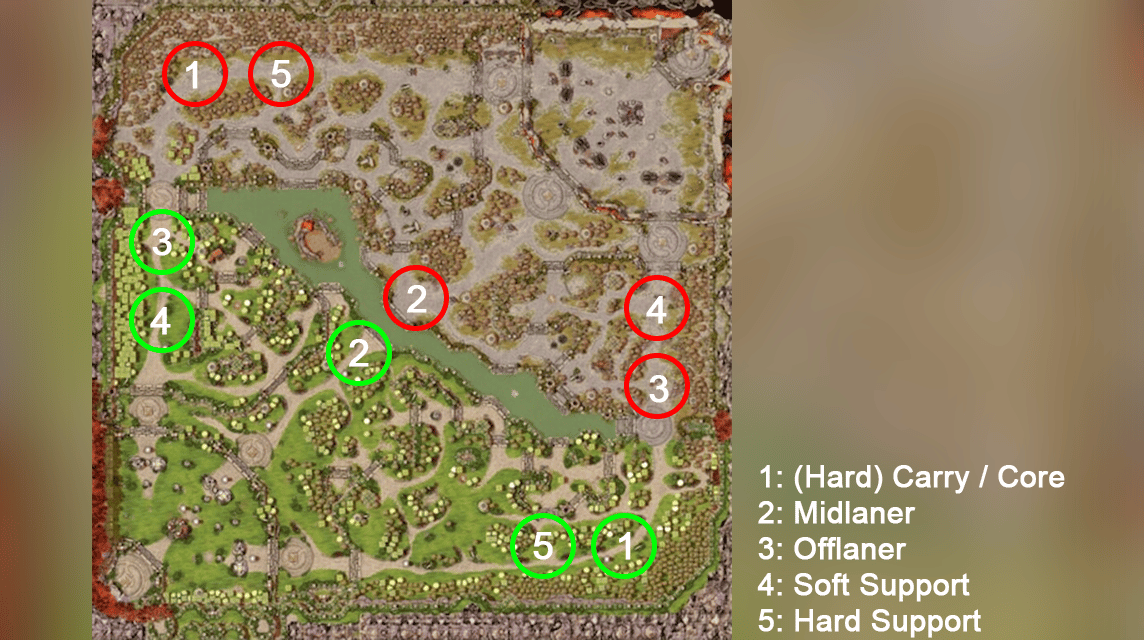

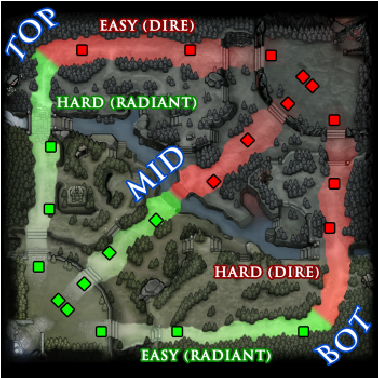

#### Renaming cluster labels according to descriptive analysis of heroes

In [ ]:
players_positions = players_clusters.assign(hero_position = players_clusters['hero_cluster'].astype('category').cat. \
                                               rename_categories({0: 'offlaners', 1: 'carry', 2: 'midlaners', 3: 'supports'}))
players_positions = players_positions.drop(columns=['hero_cluster'])
players_positions.head()

hero_id  gold_spent  gold_per_min  xp_per_min  hero_damage  tower_damage  \
0       86       10960           347         362         8690           143   
1       51       17760           494         659        23747           423   
2       83       12195           350         385         4217           399   
3       11       22505           599         605        14832          6055   
4       67       23825           613         762        33740          1833   

         kda  level hero_position  
0   9.000000     16      supports  
1  10.333333     22     offlaners  
2   3.750000     17      supports  
3   6.750000     21     midlaners  
4  12.333333     24         carry

In [ ]:
na.summary(players_positions).T

NA count  NA, % (per column)  NA, % (of all NAs)  \
hero_id             0.0                 0.0                 0.0   
gold_spent          0.0                 0.0                 0.0   
gold_per_min        0.0                 0.0                 0.0   
xp_per_min          0.0                 0.0                 0.0   
hero_damage         0.0                 0.0                 0.0   
tower_damage        0.0                 0.0                 0.0   
kda                 0.0                 0.0                 0.0   
level               0.0                 0.0                 0.0   
hero_position       0.0                 0.0                 0.0   

               NA unique (per column)  NA unique, % (per column)  \
hero_id                           0.0                        0.0   
gold_spent                        0.0                        0.0   
gold_per_min                      0.0                        0.0   
xp_per_min                        0.0                        0.0   
hero_damage                       0.0                        0.0   
tower_damage                      0.0                        0.0   
kda                               0.0                        0.0   
level                             0.0                        0.0   
hero_position                     0.0                        0.0   

               Rows left after dropna()  Rows left after dropna(), %  
hero_id                        499963.0                        100.0  
gold_spent                     499963.0                        100.0  
gold_per_min                   499963.0                        100.0  
xp_per_min                     499963.0                        100.0  
hero_damage                    499963.0                        100.0  
tower_damage                   499963.0                        100.0  
kda                            499963.0                        100.0  
level                          499963.0                        100.0  
hero_position                  499963.0                        100.0

In [ ]:
players_clusters.hero_cluster.value_counts()

3    137046
1    136550
0    114526
2    111841
Name: hero_cluster, dtype: int64

In [ ]:
players_positions.hero_position.value_counts() # correct recoding

supports     137046
carry        136550
offlaners    114526
midlaners    111841
Name: hero_position, dtype: int64

In [ ]:
players_positions.hero_position.value_counts(normalize=True)

supports     0.274112
carry        0.273120
offlaners    0.229069
midlaners    0.223699
Name: hero_position, dtype: float64

In [ ]:
players_positions.to_csv('/content/drive/MyDrive/dota2_project/cluster_analysis_data/players_positions.csv', index=False)

-----------------------------------------
### Player Profile Plots
-------------------------------------

- The below plots are complited using RStudio and R programming language (see `cluster_profiles_plots.html`).

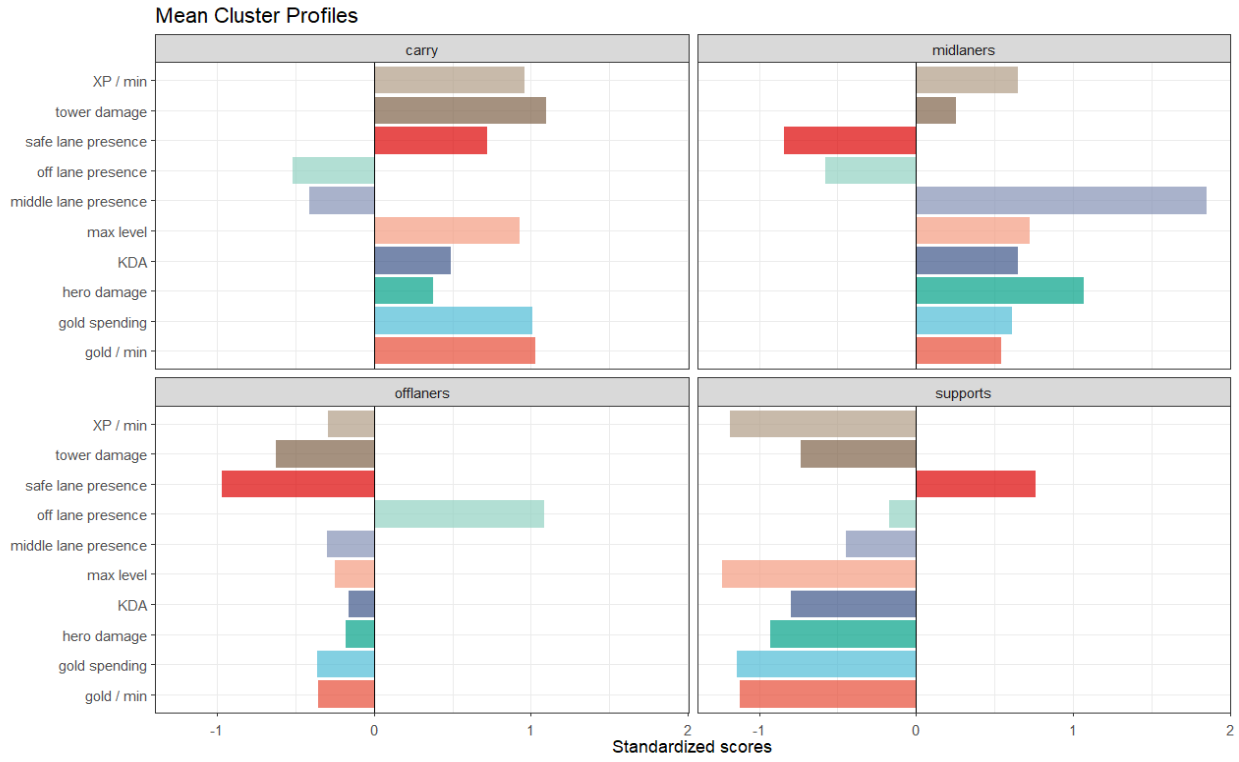

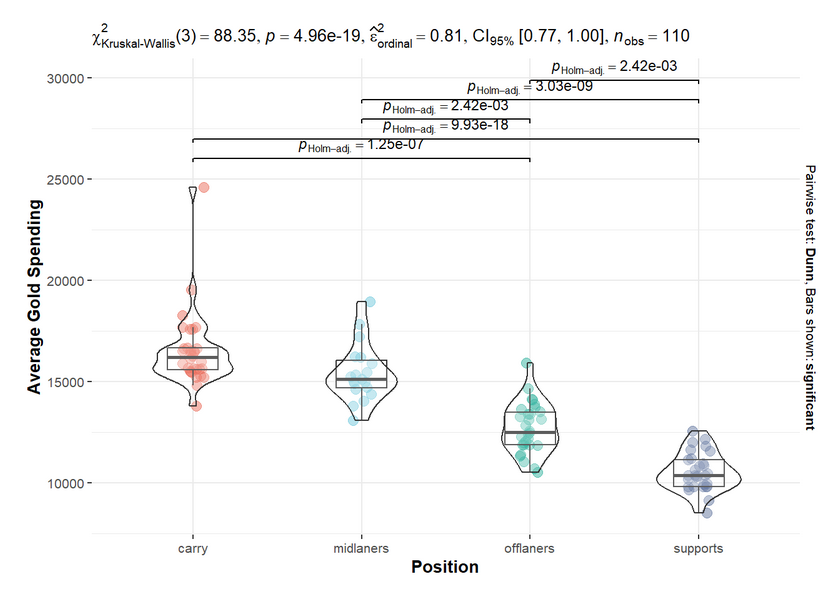

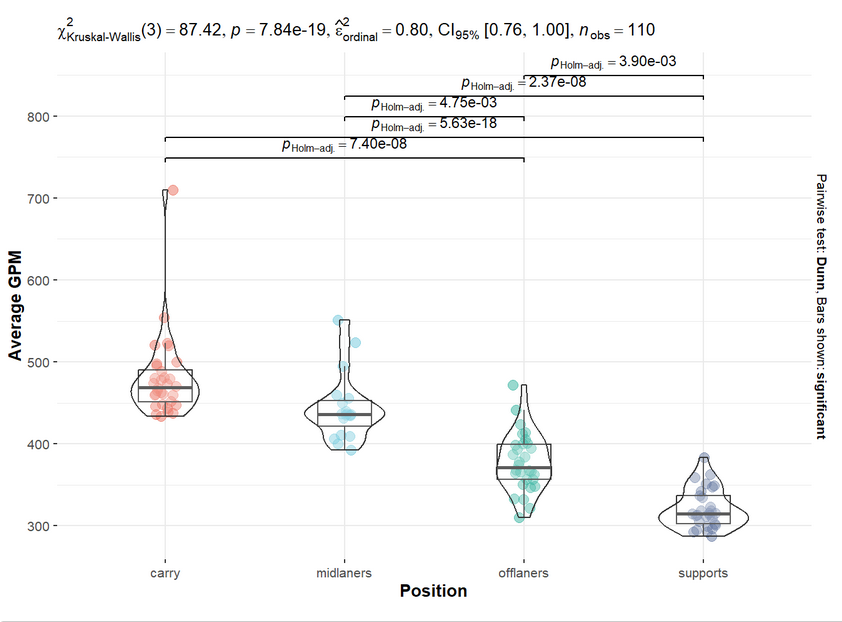

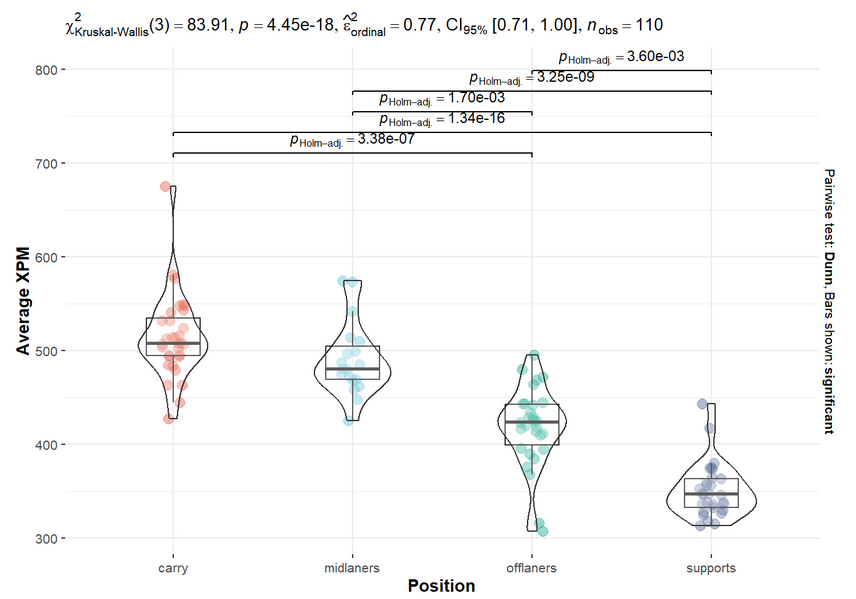

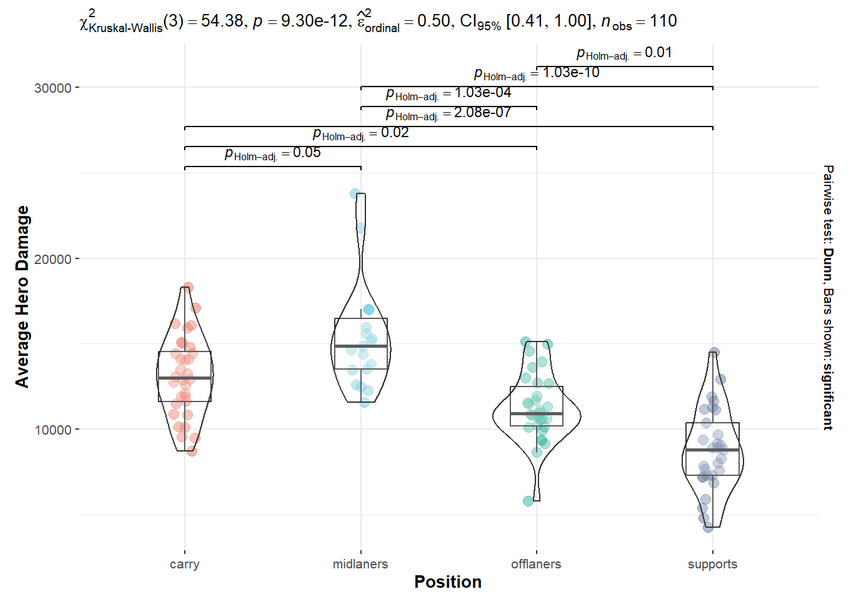

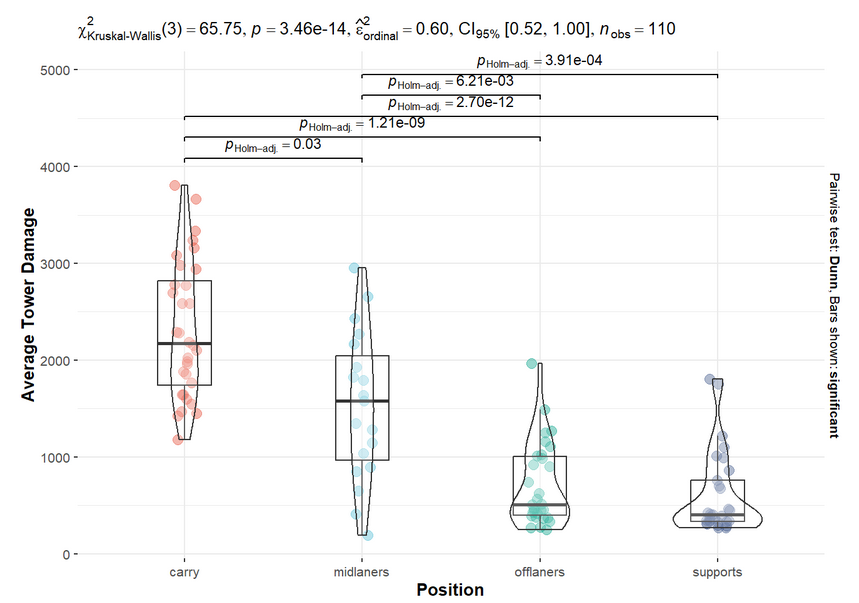

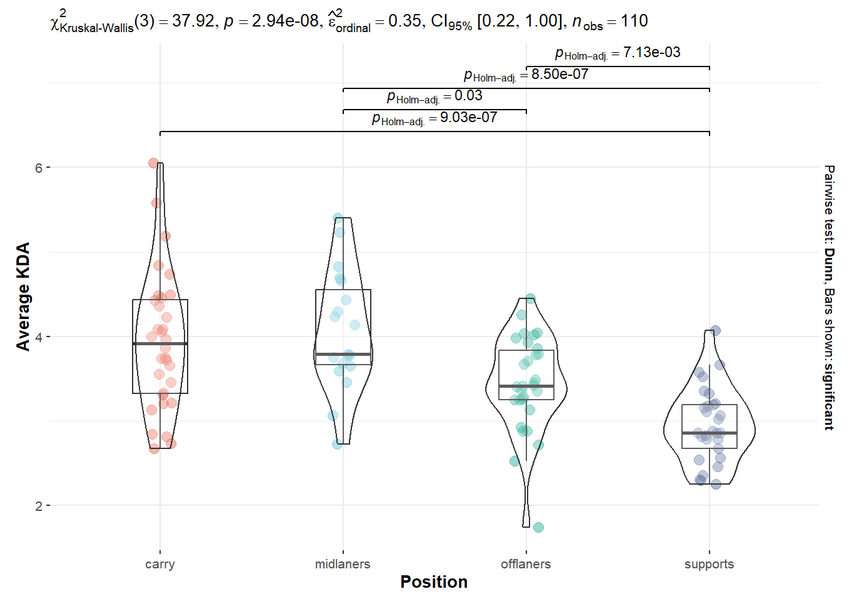

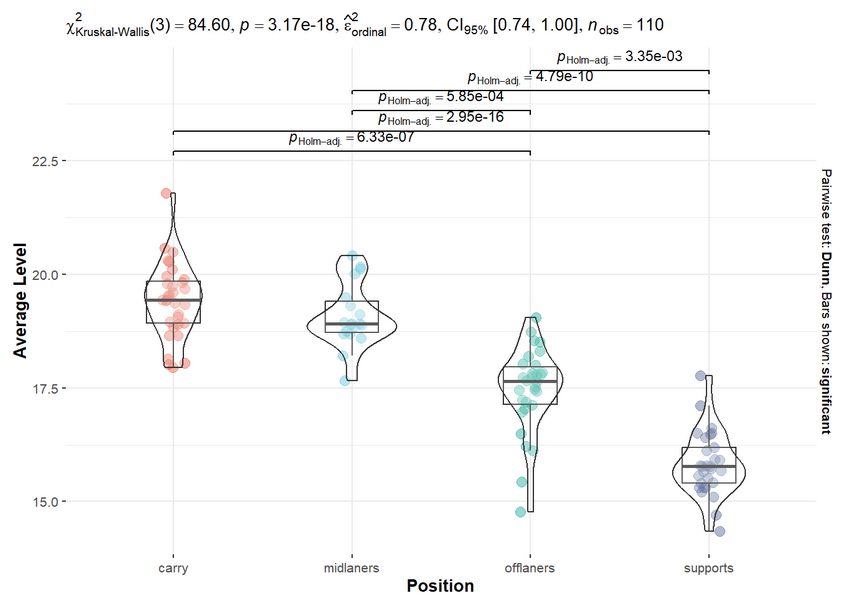